# bars_metrics

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.colors as colors
import geopandas as gpd

In [16]:
folder = 'Z:\\1.Data\\Honduras\\results\\metrics\\'
geo_folder = 'Z:\\1.Data\\Honduras\\raw\\'
monthly_file='prec_metrics_monthly.csv'
overall_file='prec_metrics_overall.csv'
geo_file = 'groups_prec.csv'

r10_over_file='r10_metrics_overall.csv'
r15_over_file= 'r15_metrics_overall.csv'

r10_monthly_file='r10_metrics_monthly.csv'
r15_monthly_file= 'r15_metrics_monthly.csv'


In [3]:
geo=  pd.read_csv(geo_folder+geo_file).rename(
        columns={'Unnamed: 0':'estacion'})
geo['cuenca'].replace('altlantico', 'atlantico', inplace=True)

In [7]:

preci=pd.read_csv(folder+overall_file).rename(
        columns={'Unnamed: 0':'estacion'})
r10_over=pd.read_csv(folder+r10_over_file).rename(
        columns={'Unnamed: 0':'estacion'})
r15_over=pd.read_csv(folder+r15_over_file).rename(
        columns={'Unnamed: 0':'estacion'})


preci = preci.merge(geo, how='inner', on='estacion')
r10_over = r10_over.merge(geo, how='inner', on='estacion')
r15_over = r15_over.merge(geo, how='inner', on='estacion')

In [10]:
def bars_cuenca(df):
    medians_info = df.groupby(['source', 'cuenca']).agg(
        r2_median=('r2', 'median'),
        kendall_median=('kendall', 'median'),
        maape_median=('maape', 'median')
    )
    medians_info =medians_info.reset_index()
    
    
    palette = {
    'atlantico': 'tab:orange',
    'pacifico': 'tab:blue'}
    
    sns.barplot(data=medians_info, x="source", y="r2_median", hue="cuenca", alpha=0.5, palette=palette)
    plt.legend(loc='best',bbox_to_anchor=(1.25, 0.5))
    plt.show();
    sns.barplot(data=medians_info, x="source", y="kendall_median", hue="cuenca", alpha=0.5, palette=palette)
    plt.legend(loc='best',bbox_to_anchor=(1.25, 0.5))
    plt.show();
    sns.barplot(data=medians_info, x="source", y="maape_median", hue="cuenca", alpha=0.5, palette=palette)
    plt.legend(loc='best',bbox_to_anchor=(1.25, 0.5))

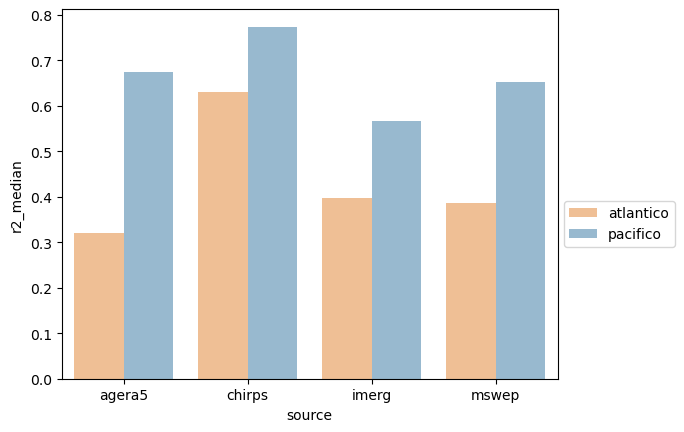

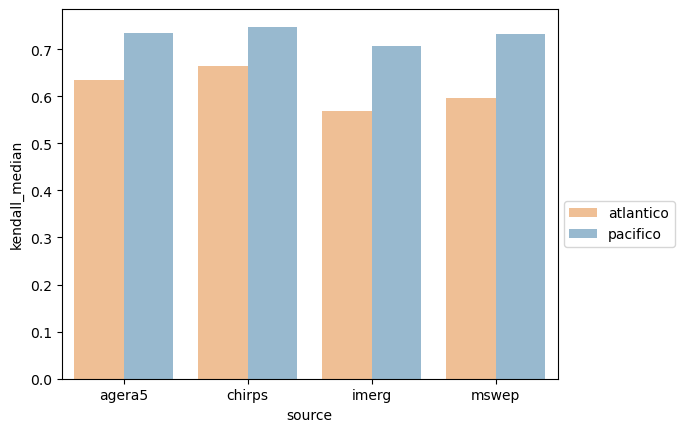

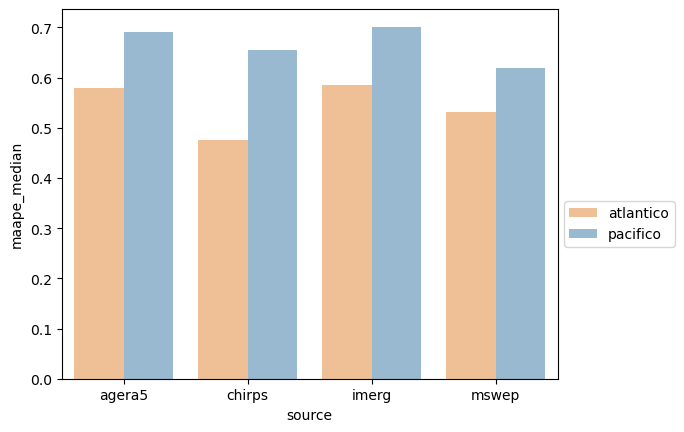

In [11]:
bars_cuenca(preci)

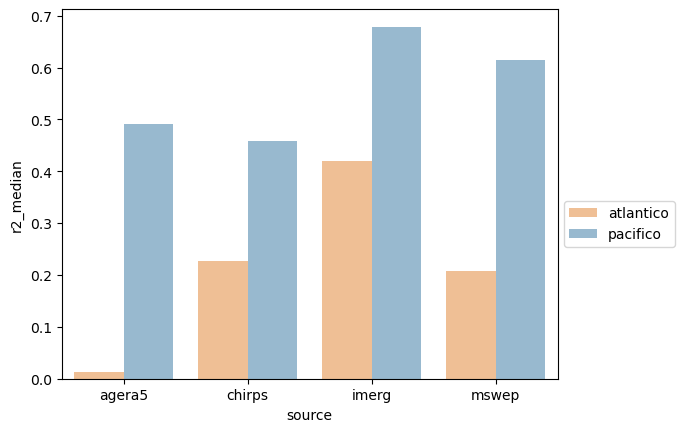

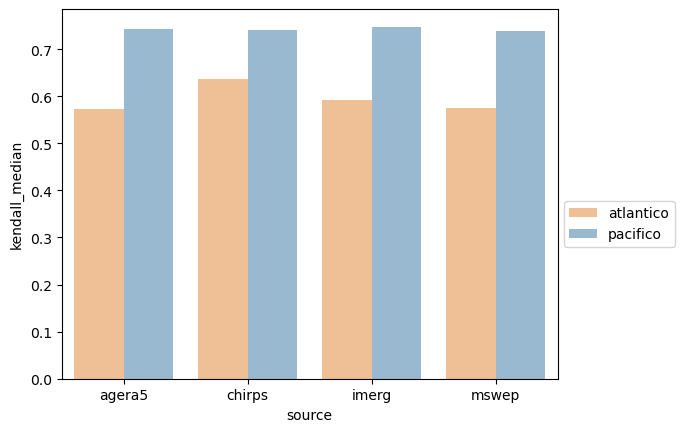

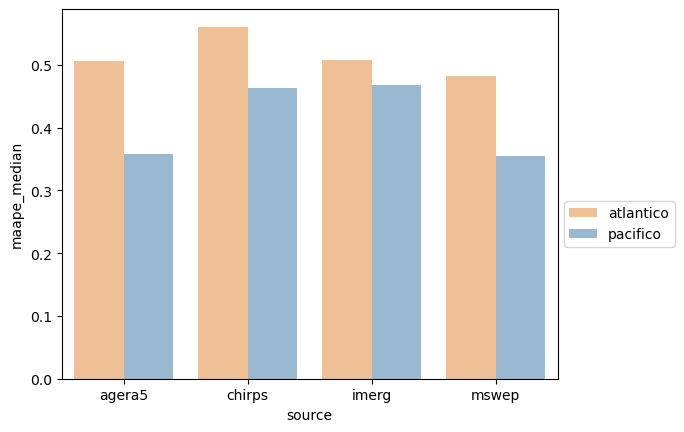

In [12]:
bars_cuenca(r10_over)

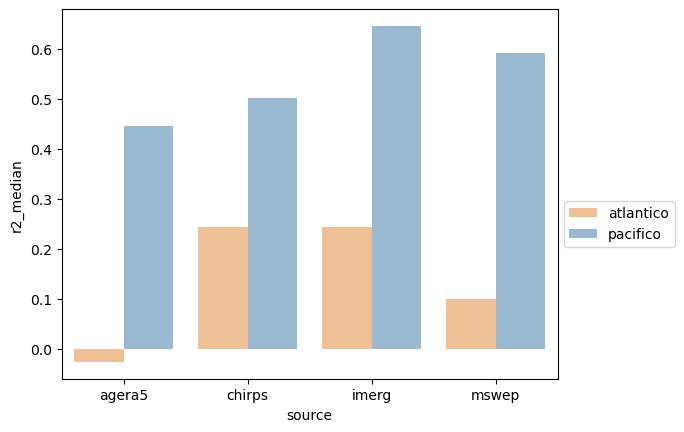

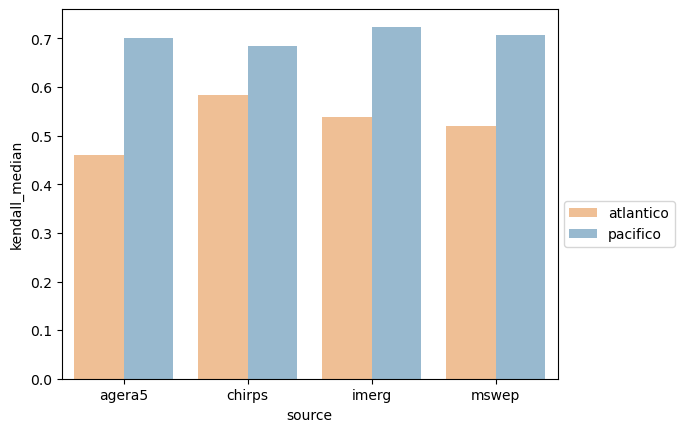

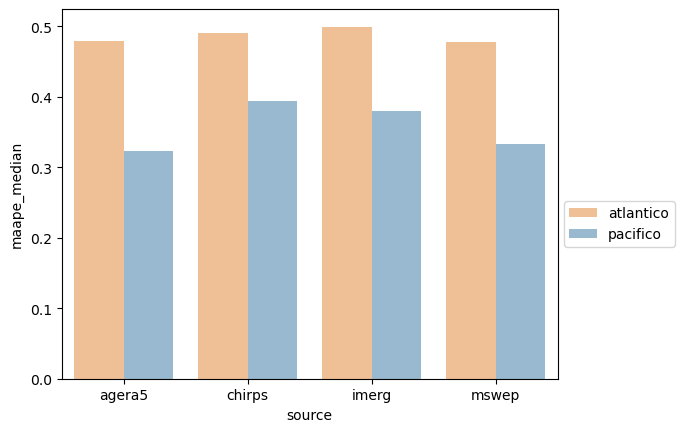

In [13]:
bars_cuenca(r15_over)

# per month

In [17]:
monthly_data = pd.read_csv(folder+monthly_file).rename(
        columns={'Unnamed: 0':'estacion'})


r10_monthly_data = pd.read_csv(folder+r10_monthly_file).rename(
        columns={'Unnamed: 0':'estacion'})

r15_monthly_data = pd.read_csv(folder+r15_monthly_file).rename(
        columns={'Unnamed: 0':'estacion'})

In [18]:
info_monthly = monthly_data.merge(geo, how='inner', on='estacion')
r10_monthly = r10_monthly_data.merge(geo, how='inner', on='estacion')
r15_monthly = r15_monthly_data.merge(geo, how='inner', on='estacion')


In [29]:
def bars_monthly_cuenca(df):
    medians_month_info = df.groupby(['source', 'cuenca', 'month']).agg(
        r2_median=('r2', 'median'),
        kendall_median=('kendall', 'median'),
        maape_median=('maape', 'median')
    )
    medians_month_info =medians_month_info.reset_index()
    
    
    palette = {
    'atlantico': 'tab:orange',
    'pacifico': 'tab:blue'}
    for month in range(1,13):
        print(f'Month {month}')
        for stat in ['r2_median','kendall_median', 'maape_median']:
            sns.barplot(
                data=medians_month_info[medians_month_info.month==month],
                x="source", y=stat, hue="cuenca", alpha=0.5, palette=palette)
            plt.legend(loc='best',bbox_to_anchor=(1.25, 0.5))
            plt.show();

Month 1


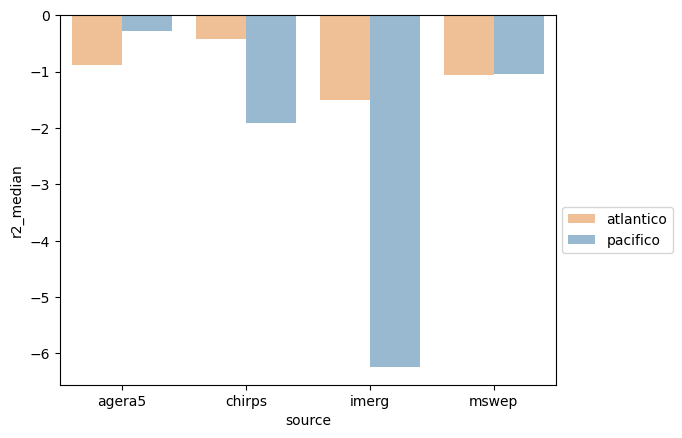

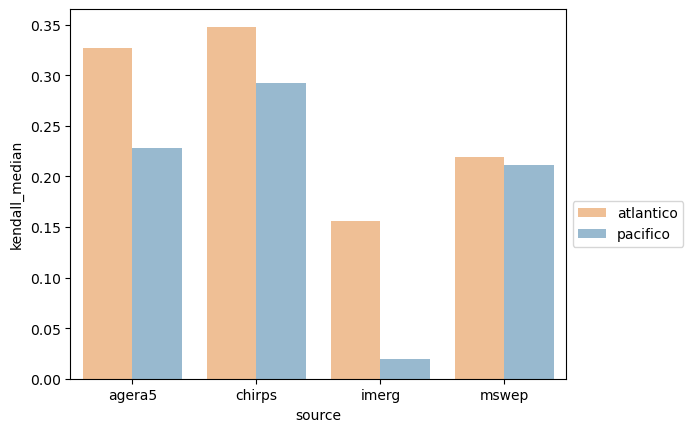

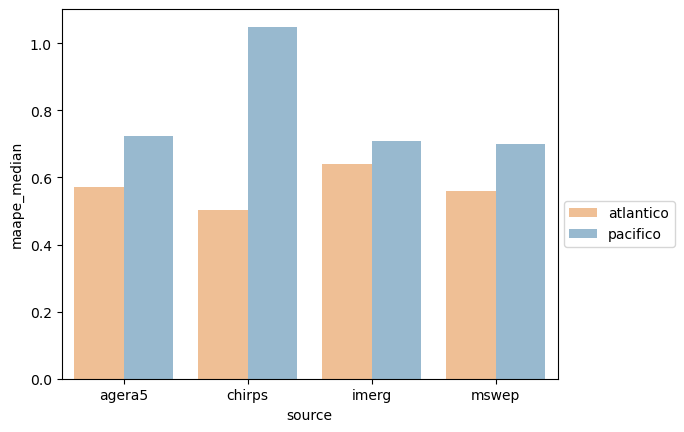

Month 2


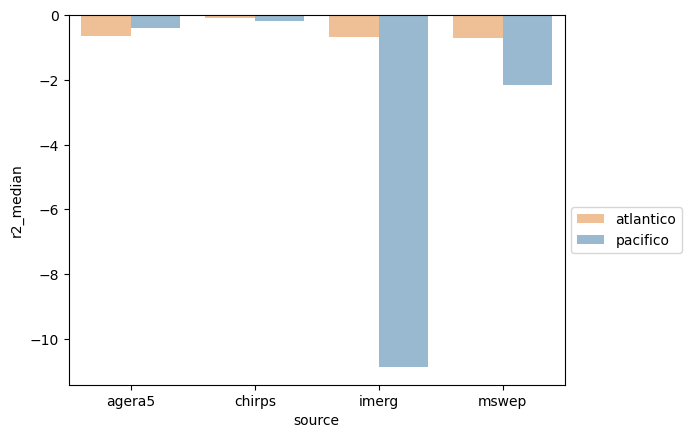

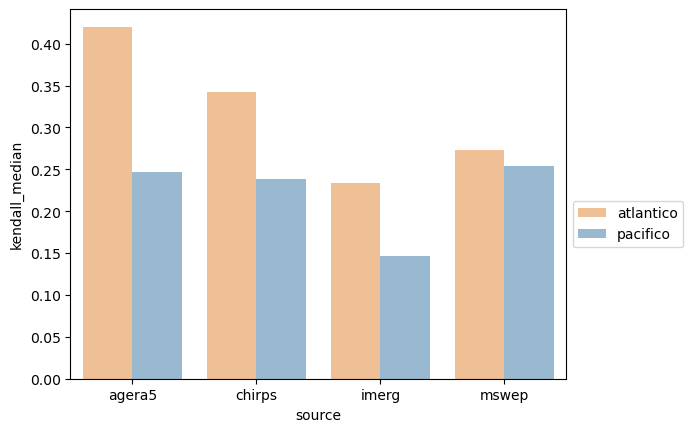

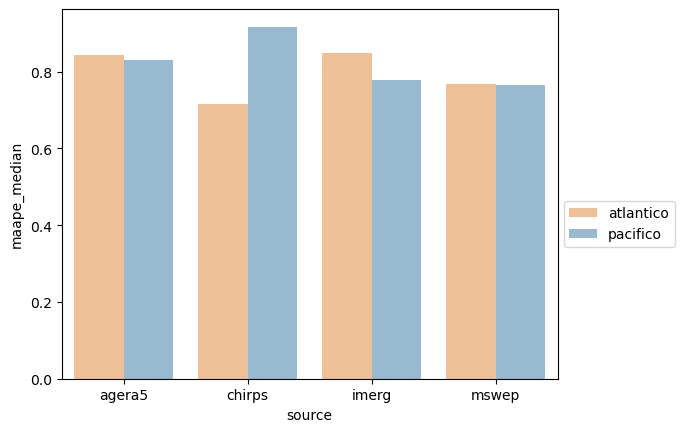

Month 3


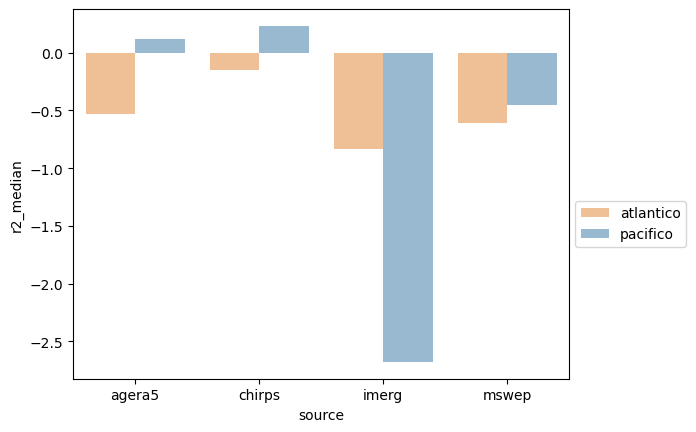

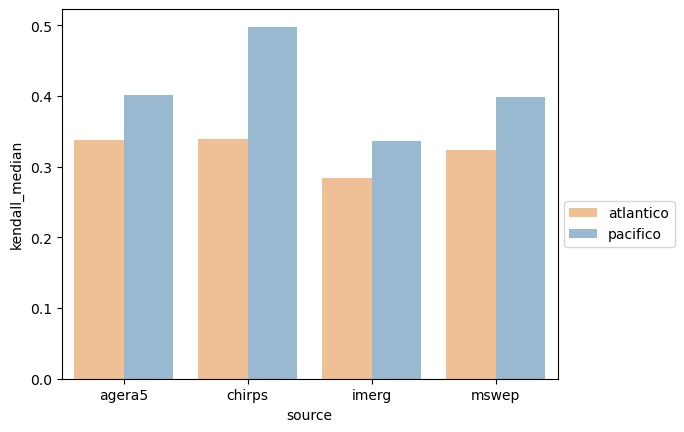

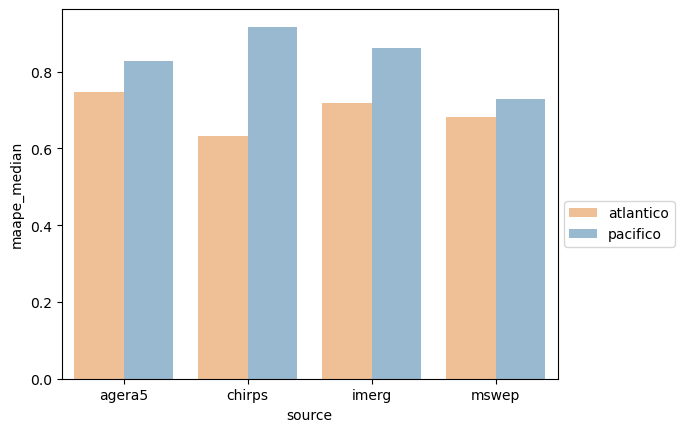

Month 4


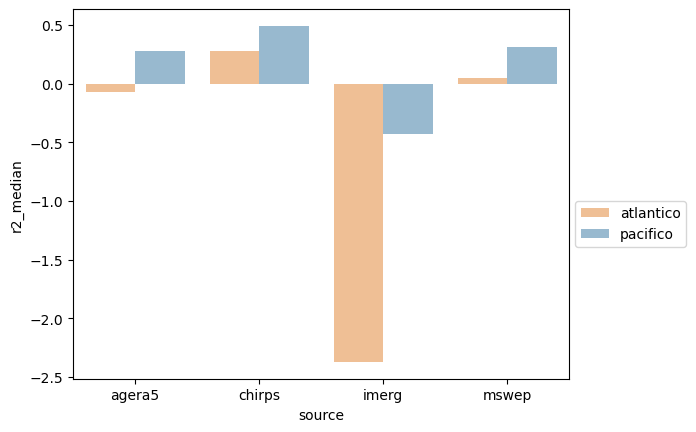

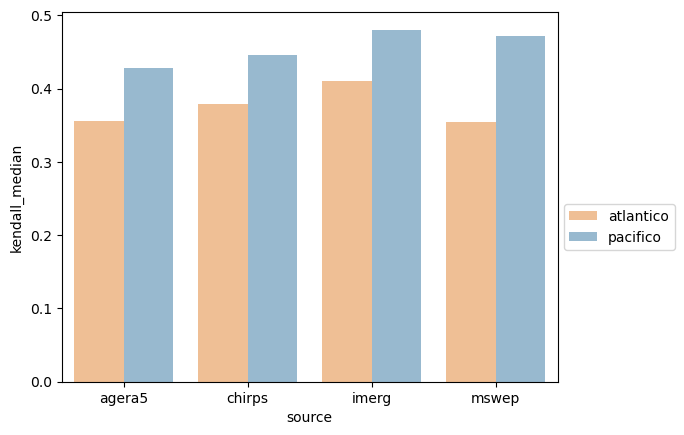

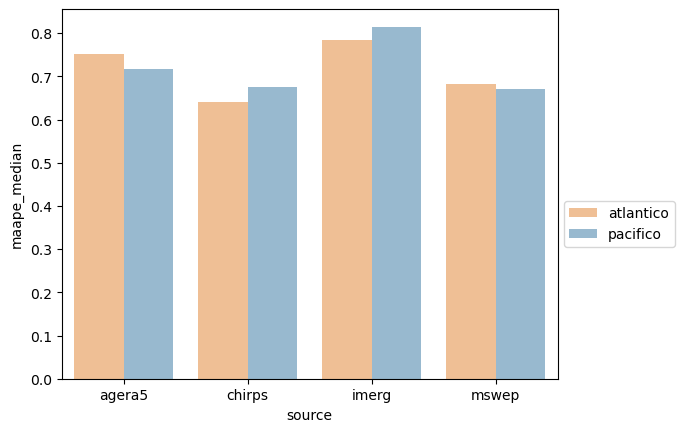

Month 5


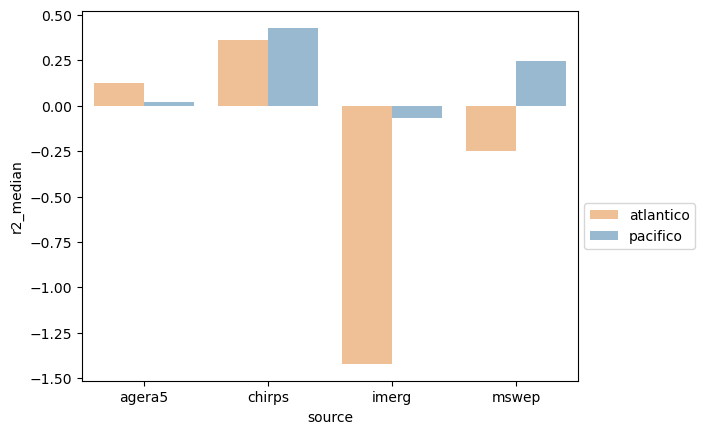

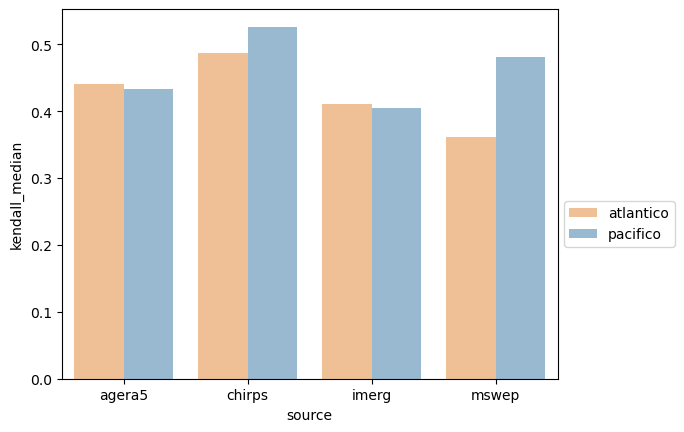

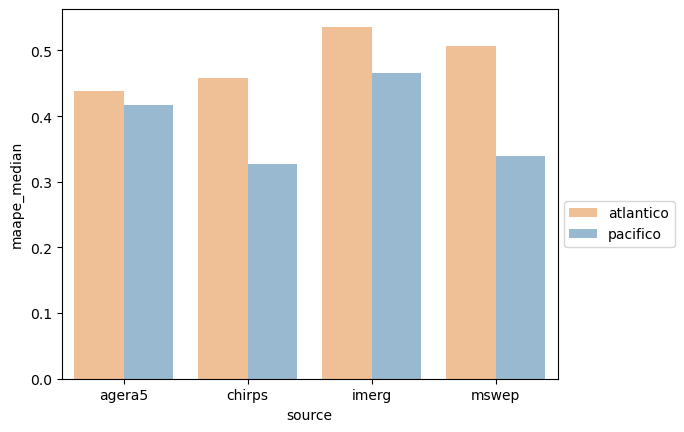

Month 6


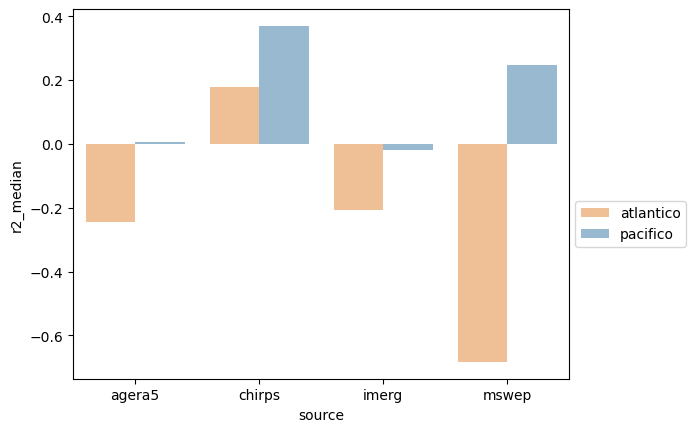

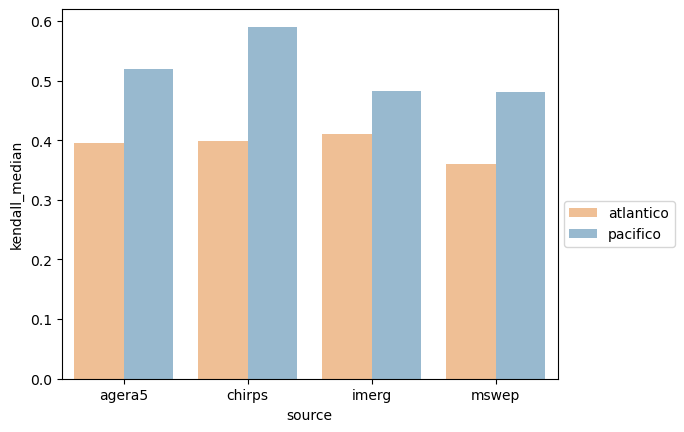

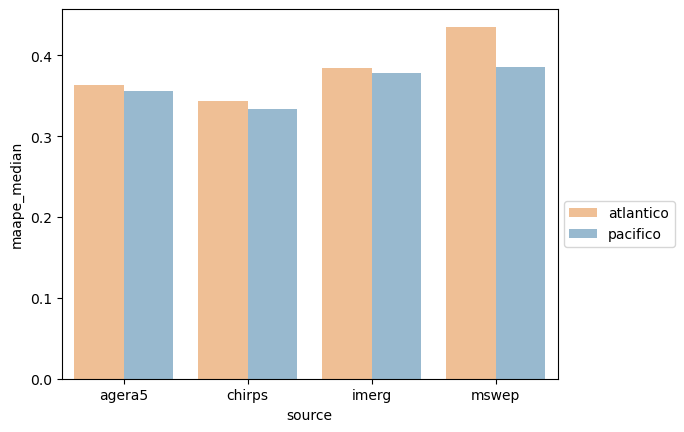

Month 7


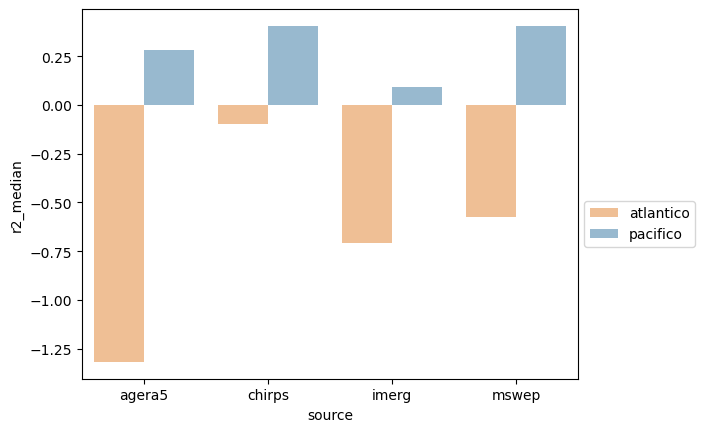

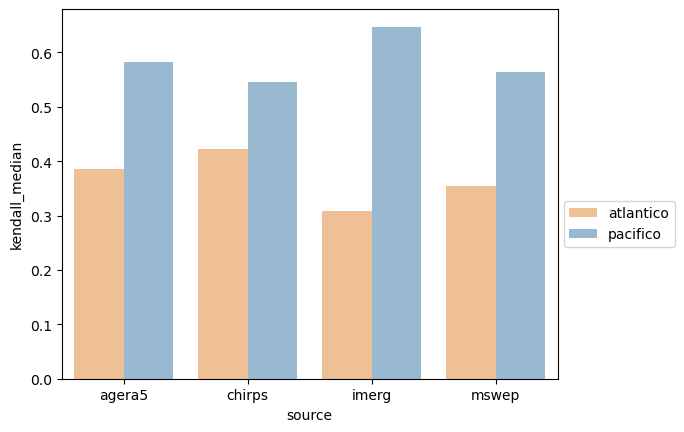

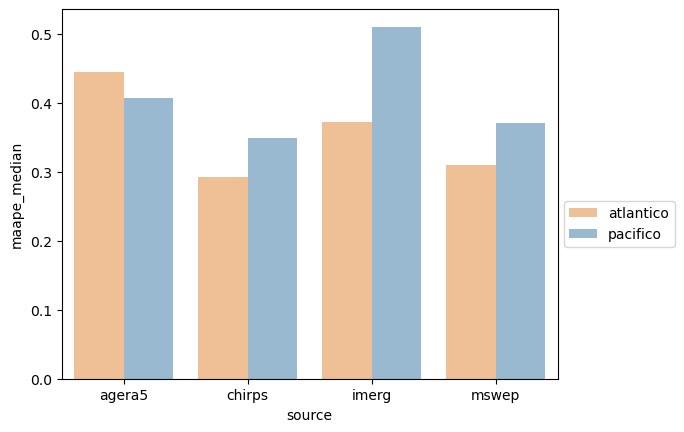

Month 8


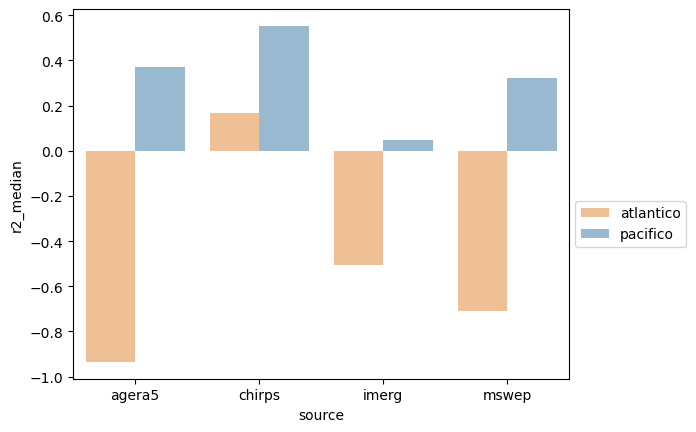

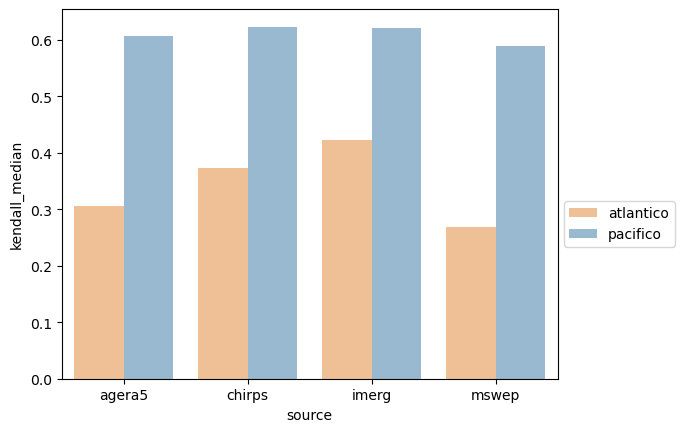

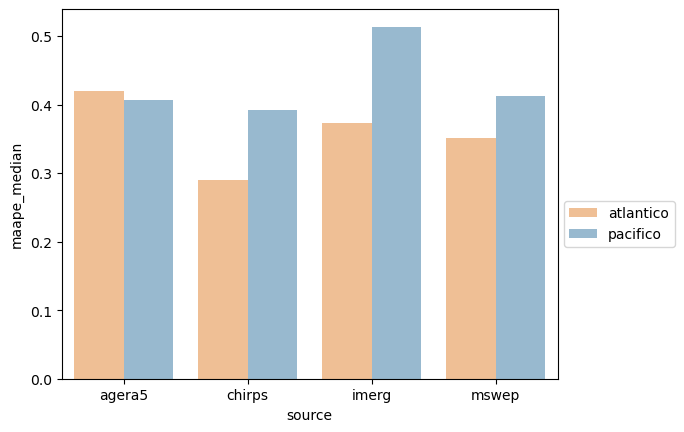

Month 9


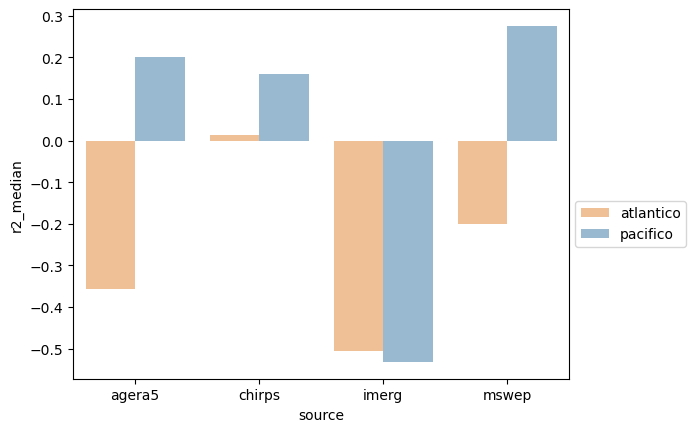

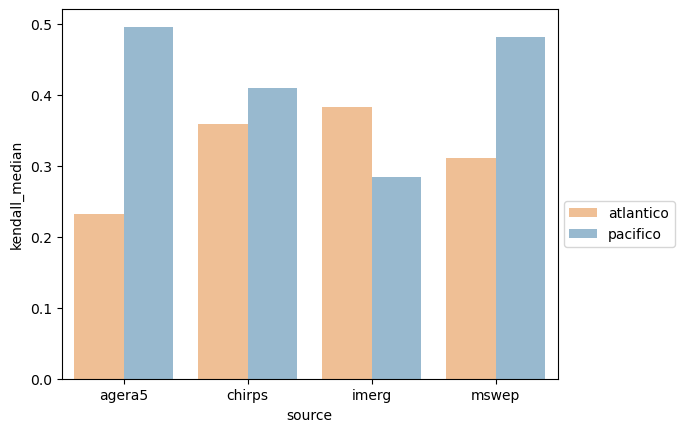

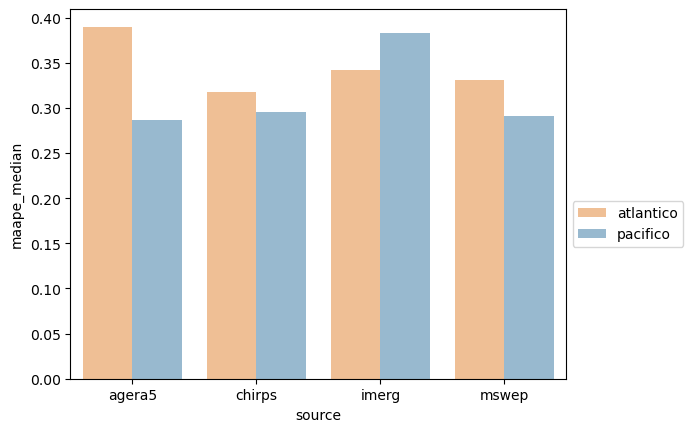

Month 10


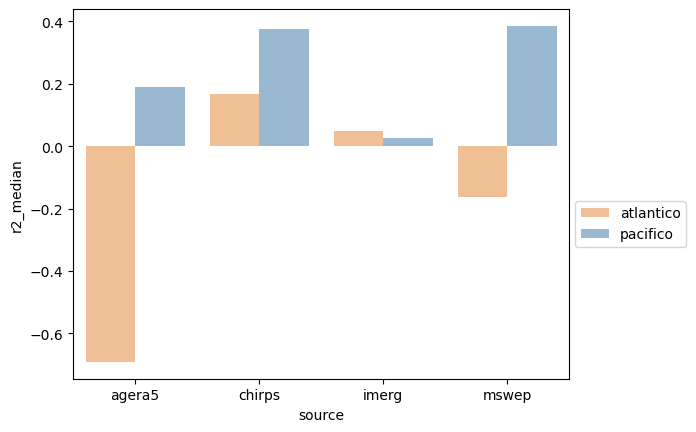

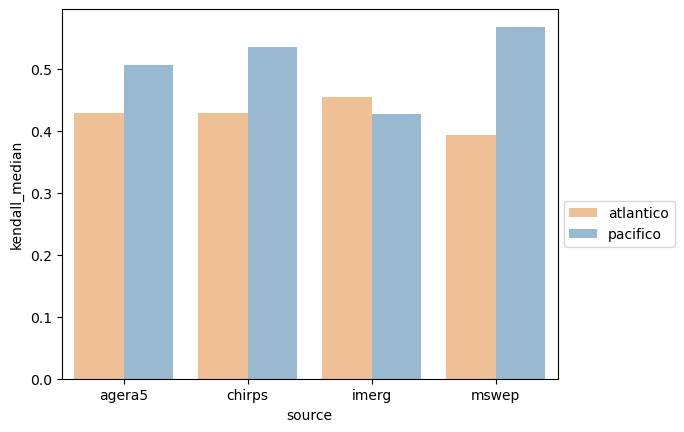

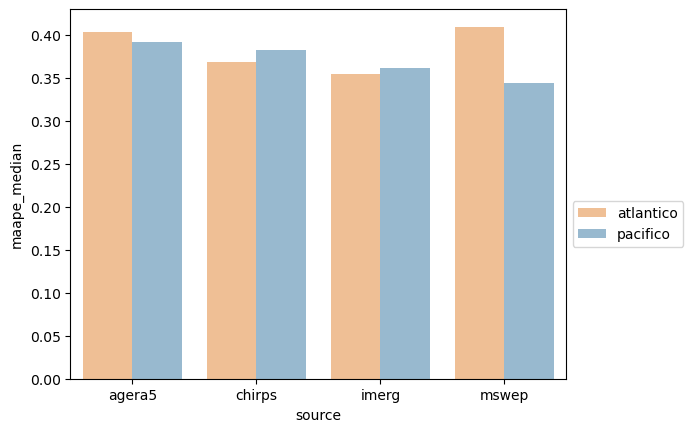

Month 11


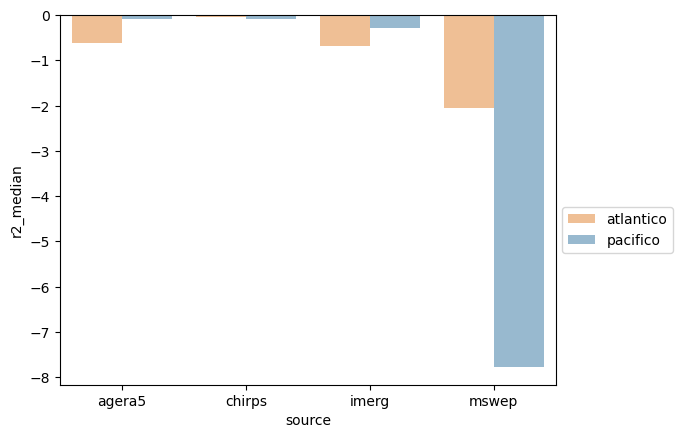

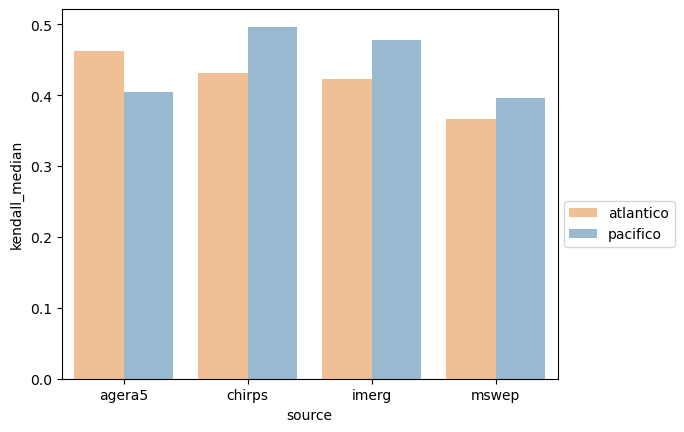

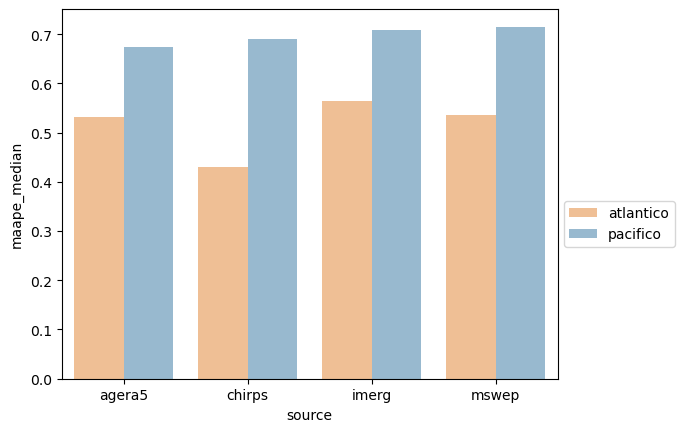

Month 12


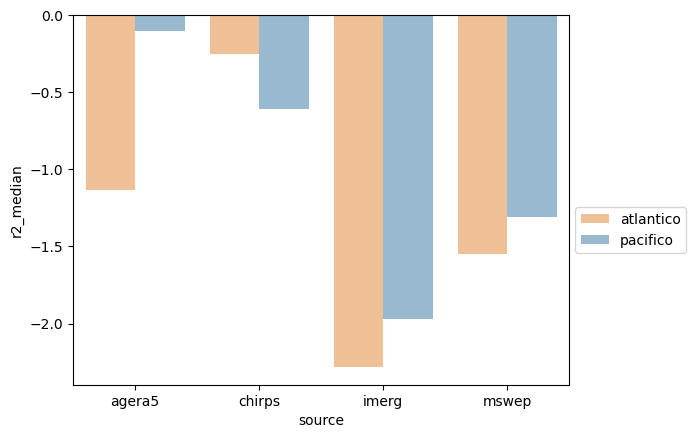

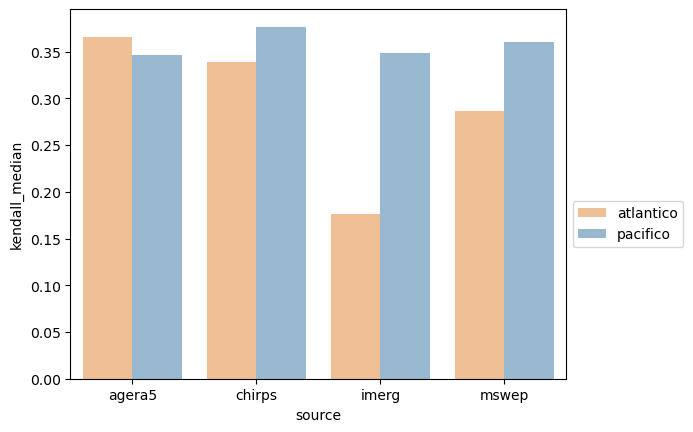

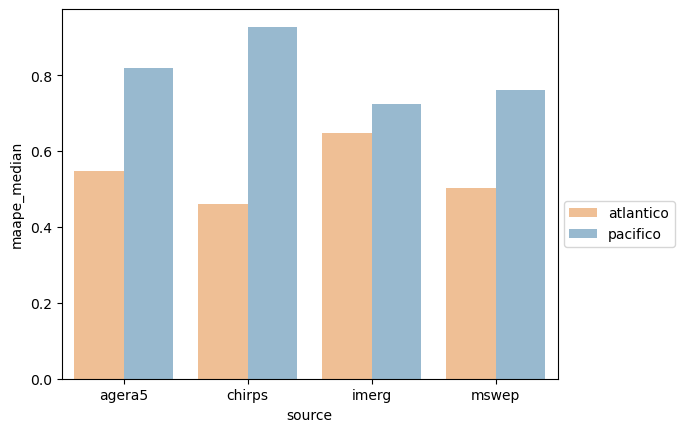

In [30]:
bars_monthly_cuenca(info_monthly)

Month 1


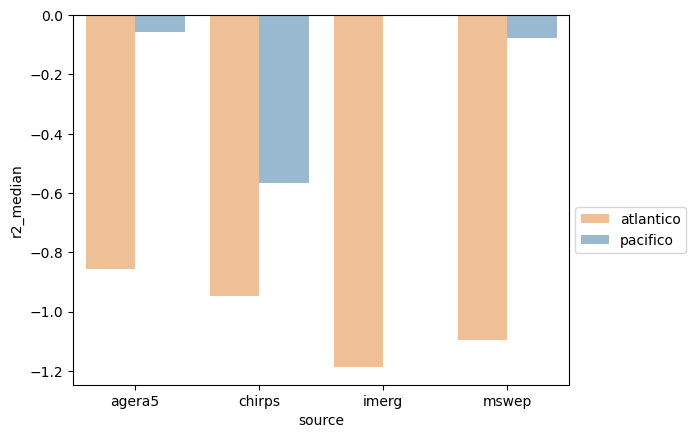

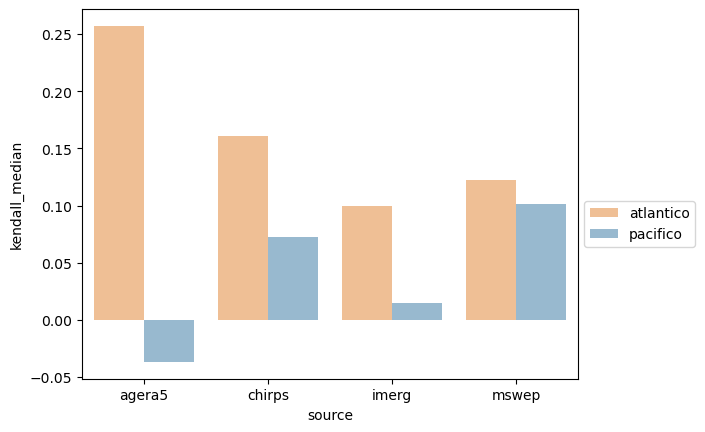

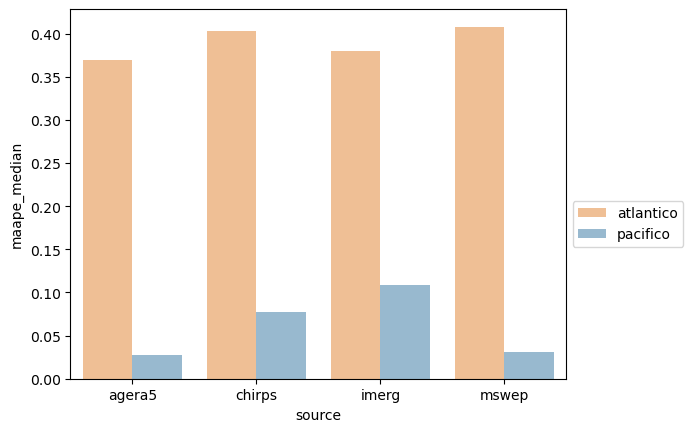

Month 2


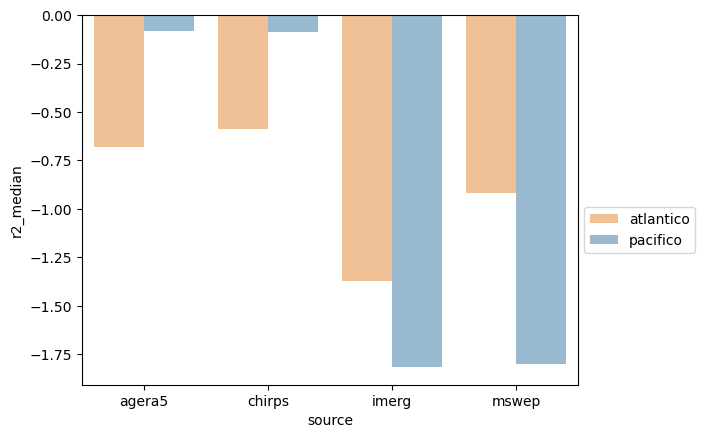

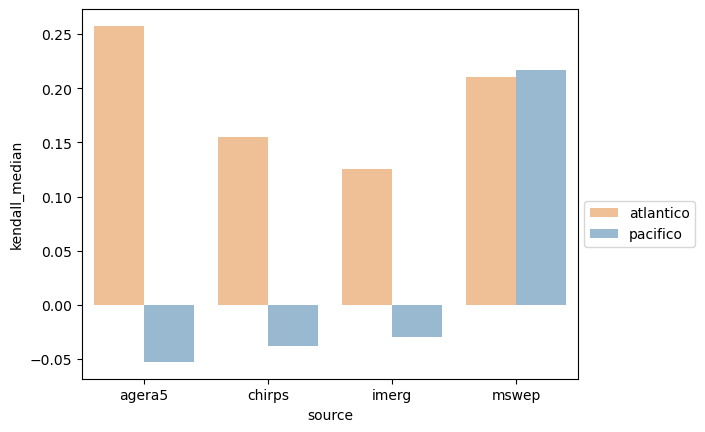

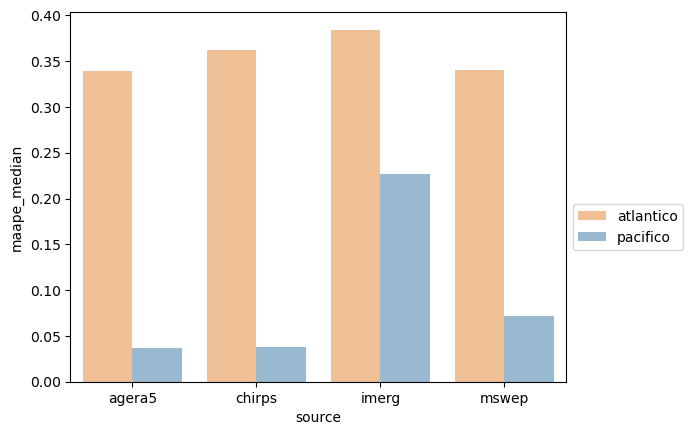

Month 3


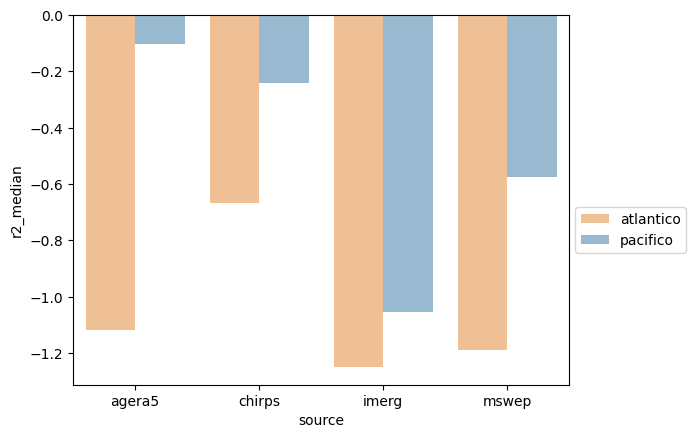

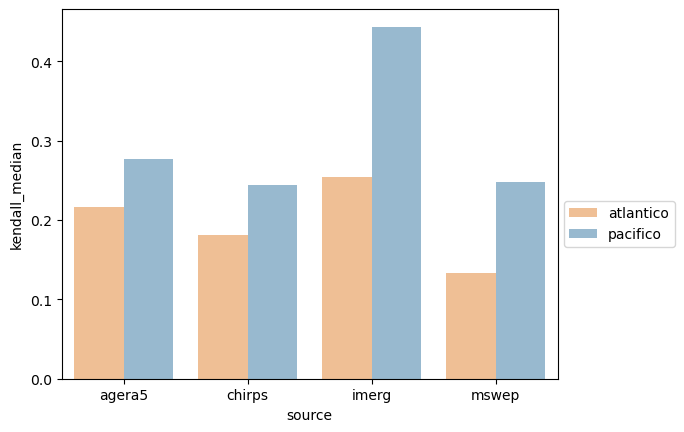

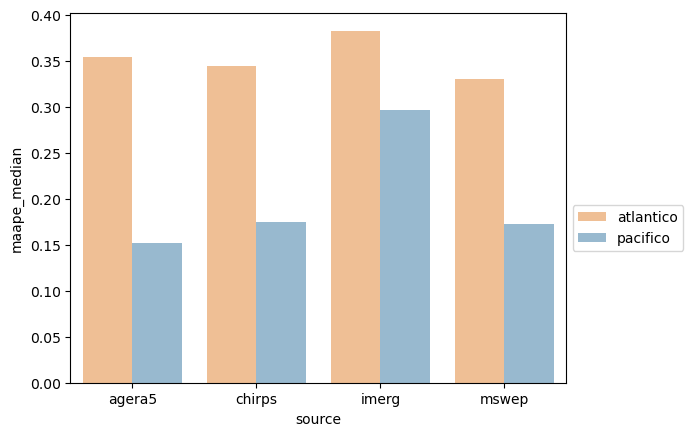

Month 4


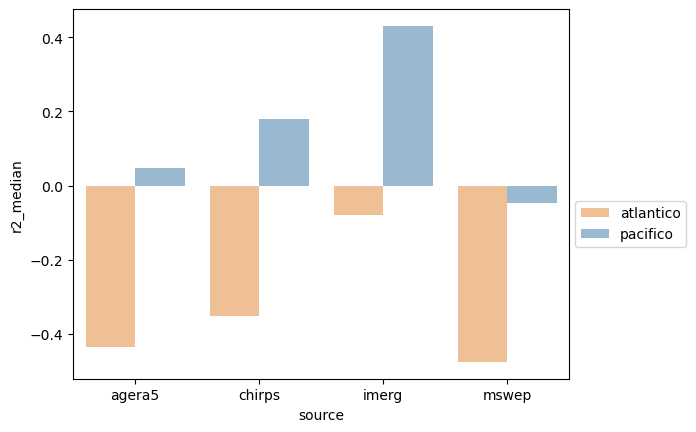

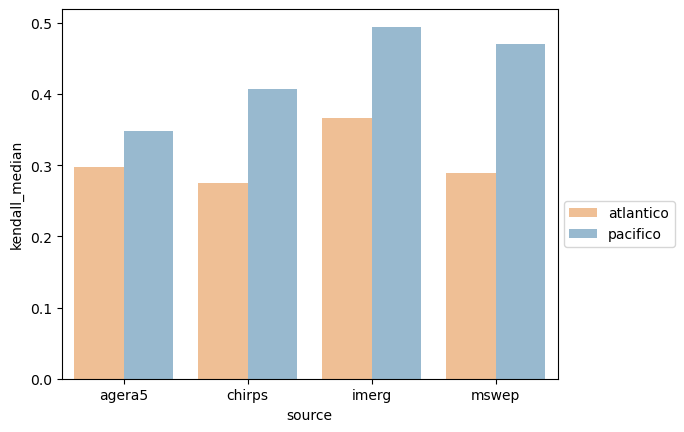

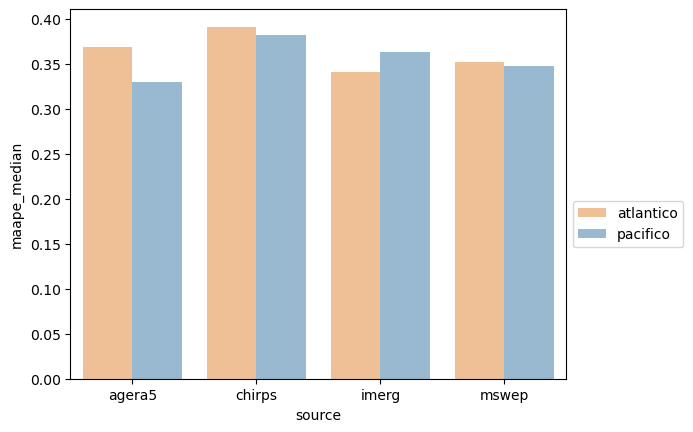

Month 5


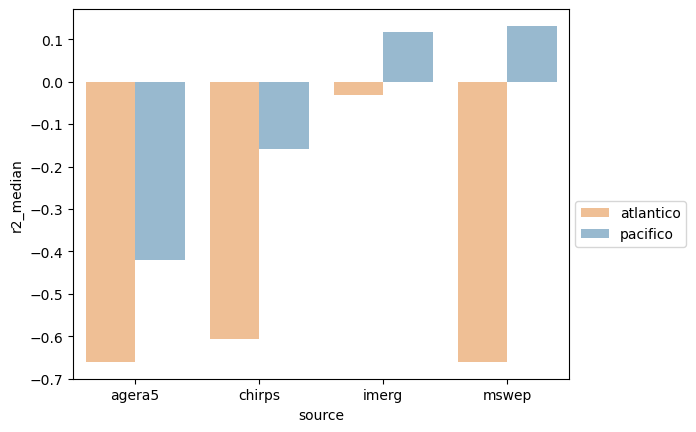

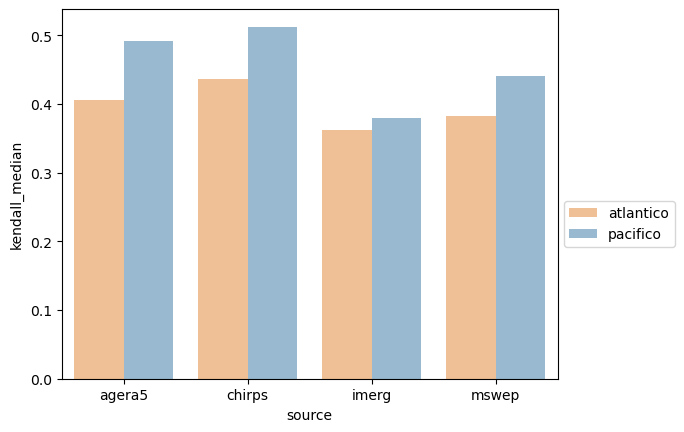

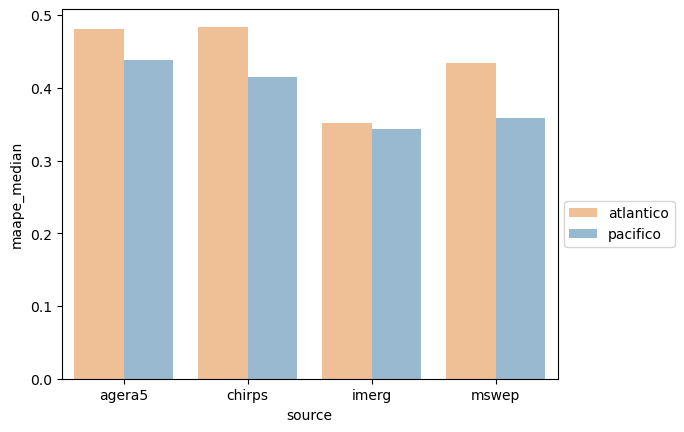

Month 6


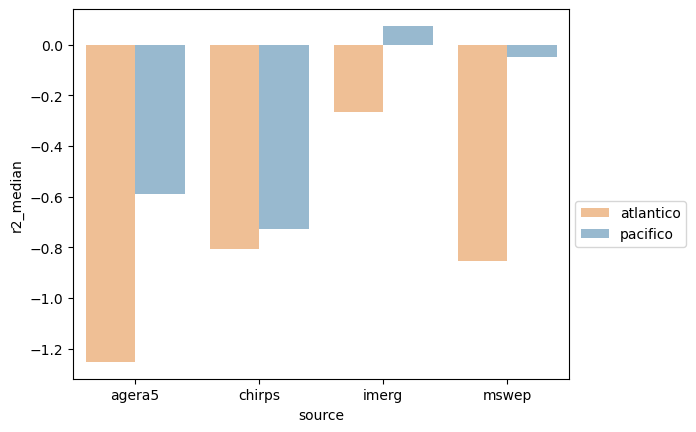

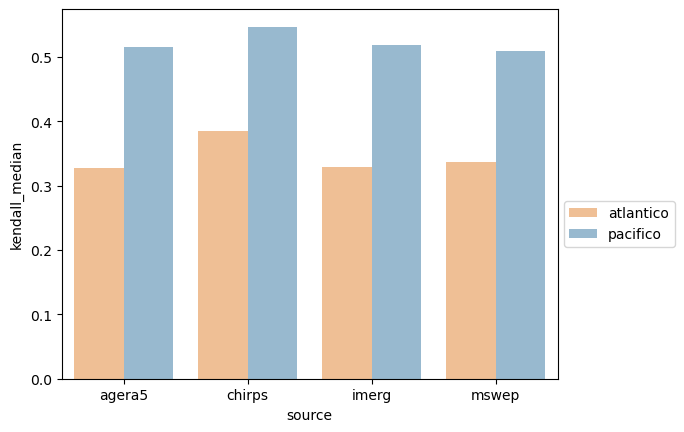

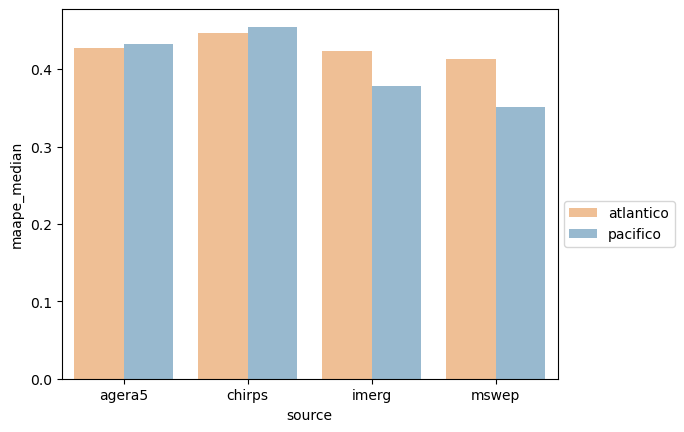

Month 7


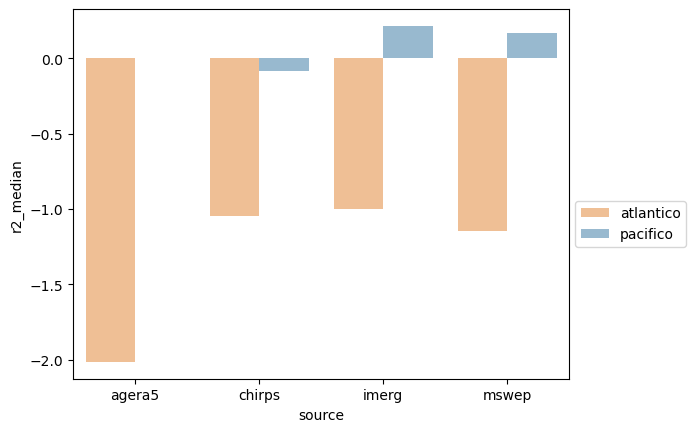

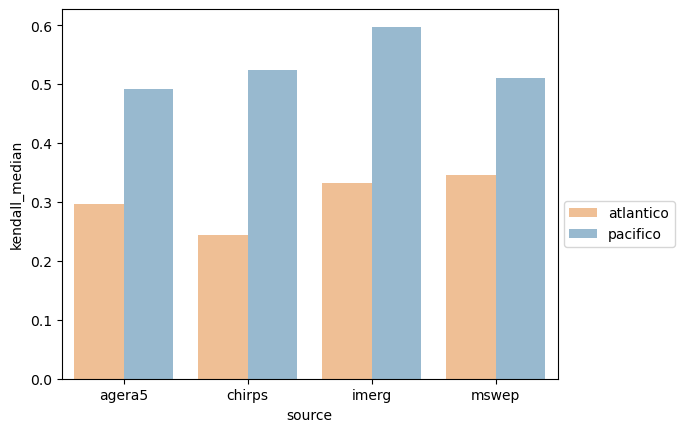

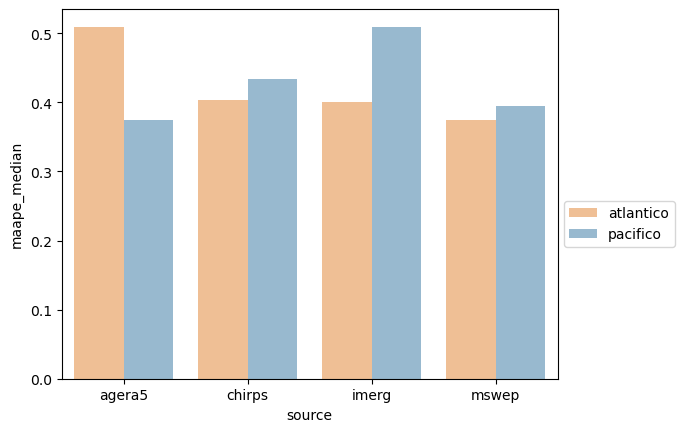

Month 8


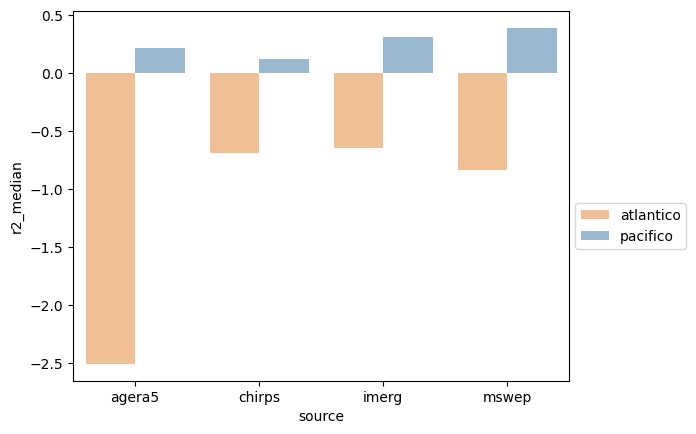

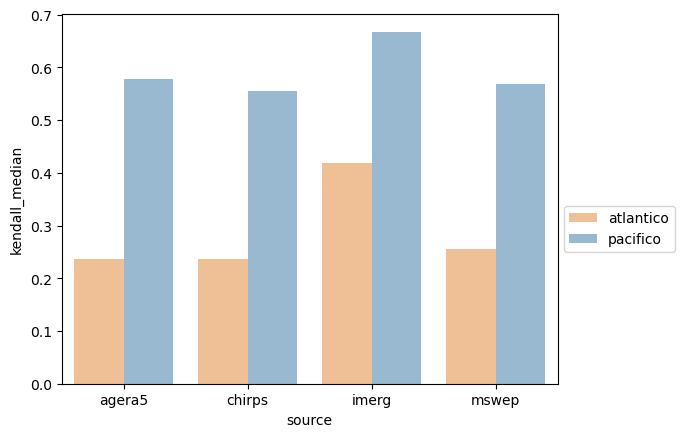

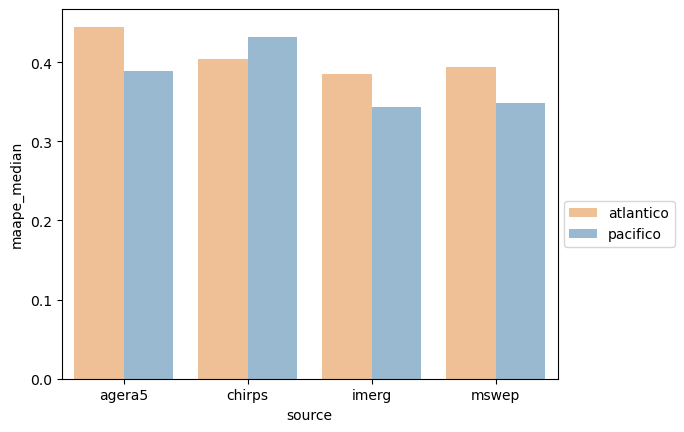

Month 9


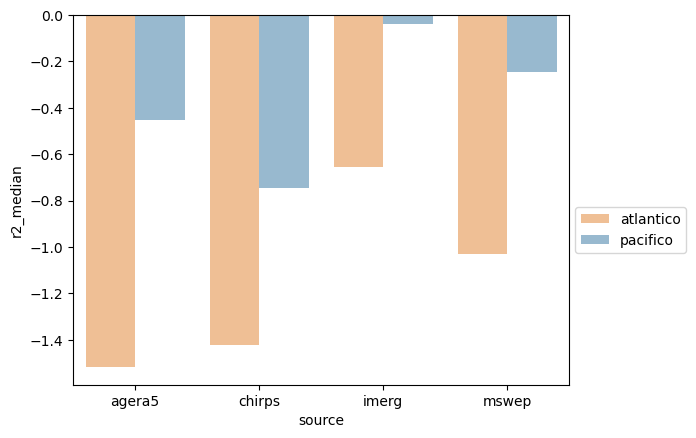

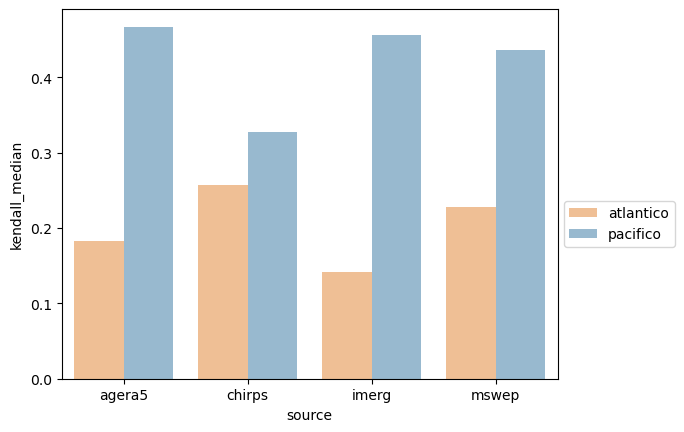

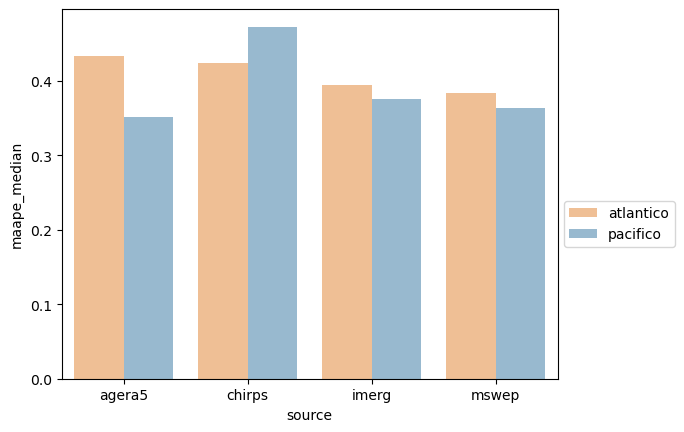

Month 10


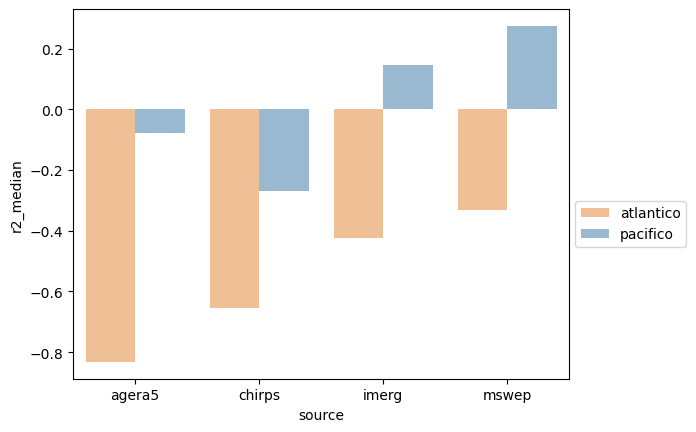

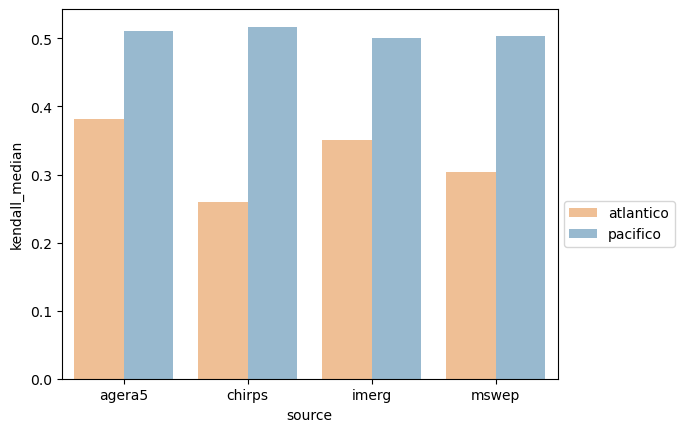

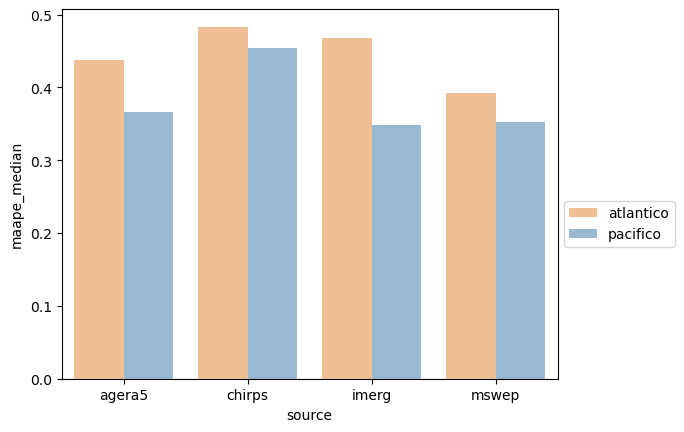

Month 11


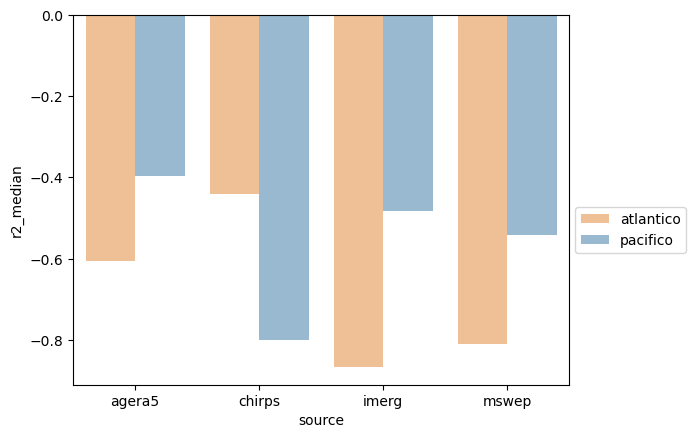

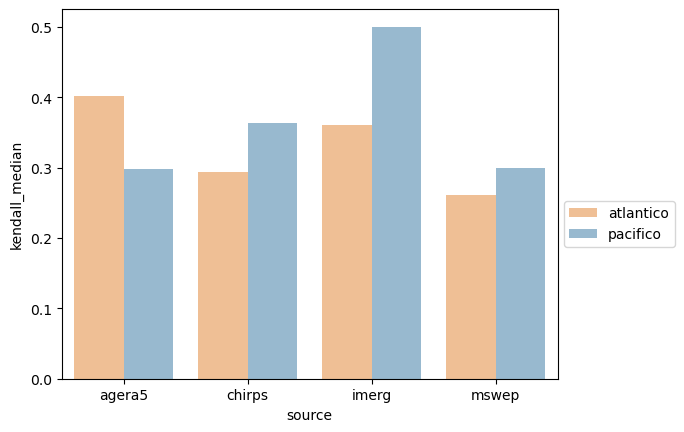

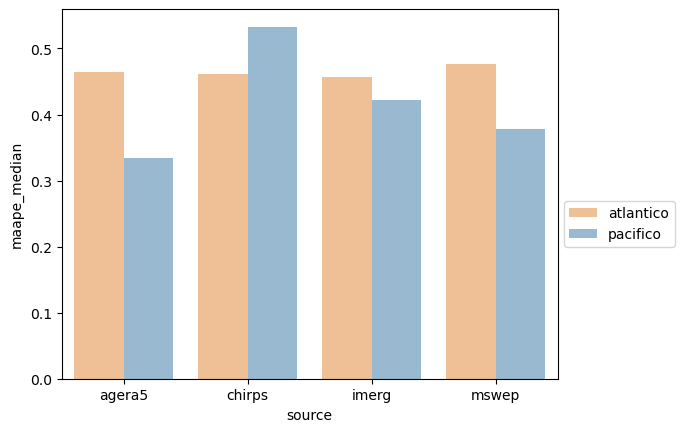

Month 12


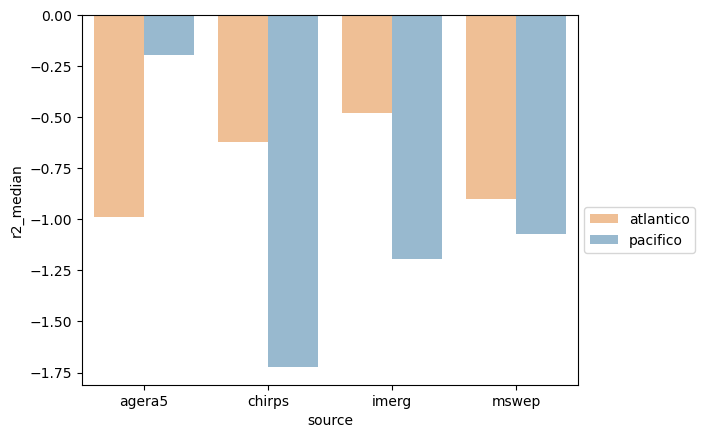

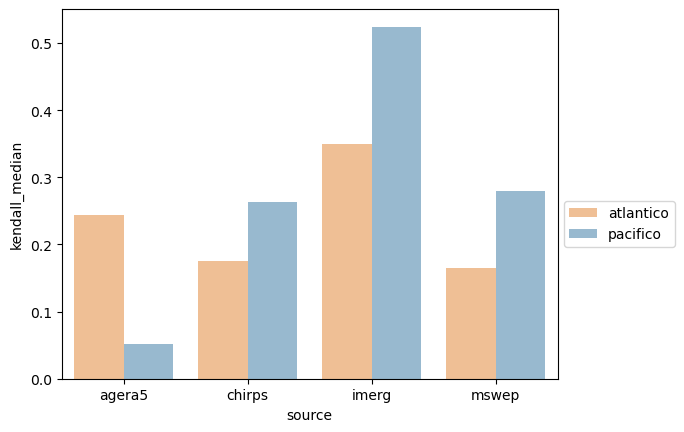

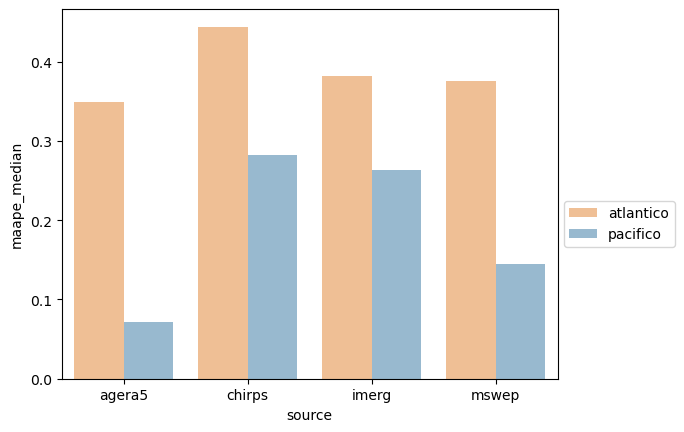

In [31]:
bars_monthly_cuenca(r10_monthly)

Month 1


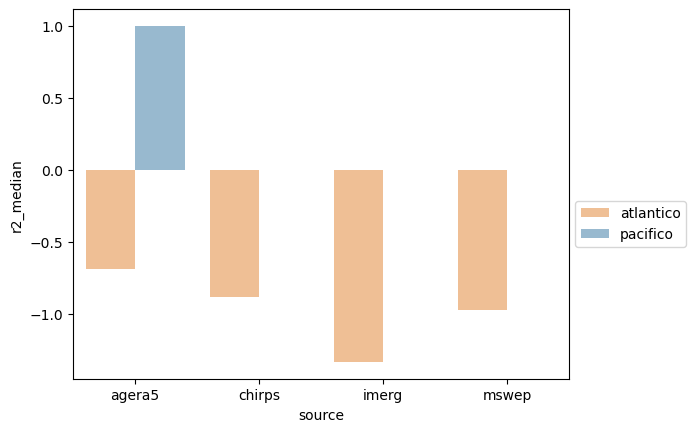

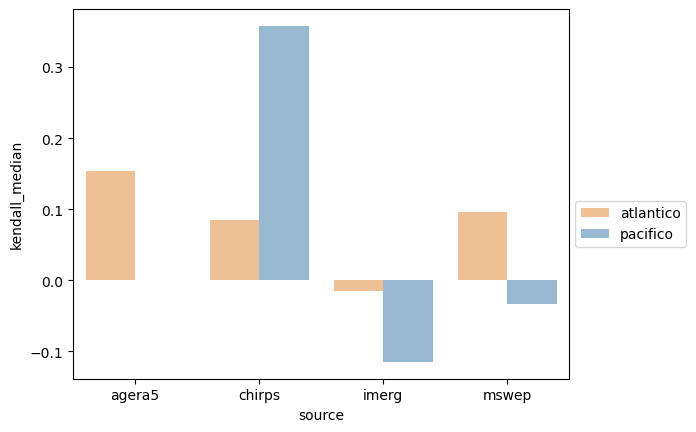

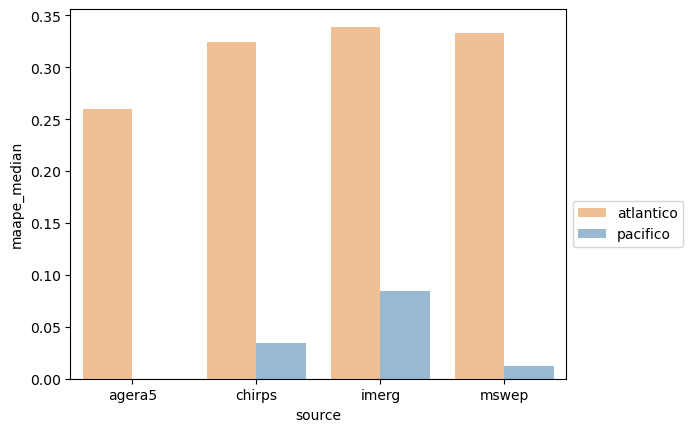

Month 2


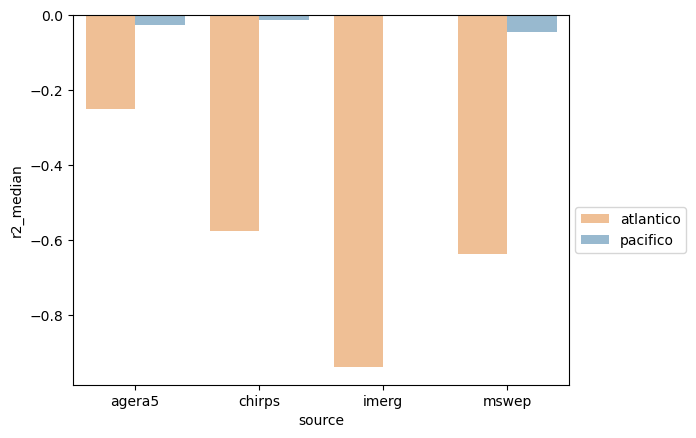

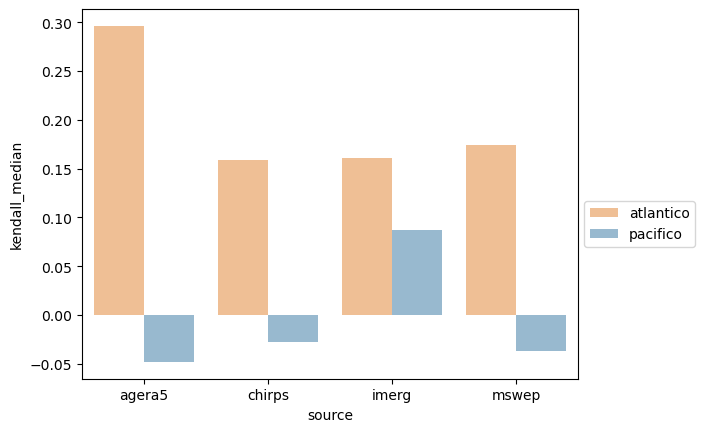

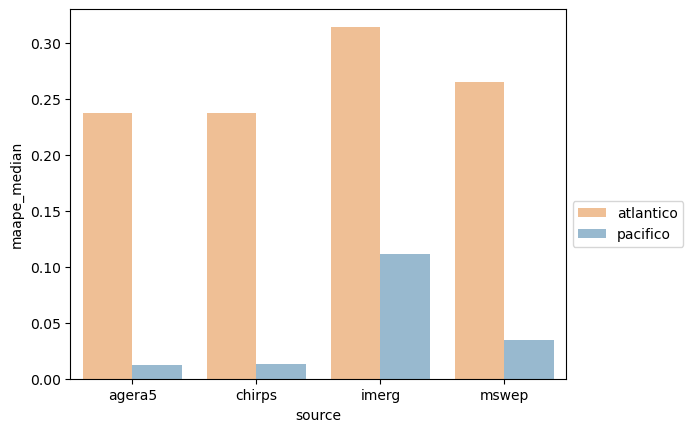

Month 3


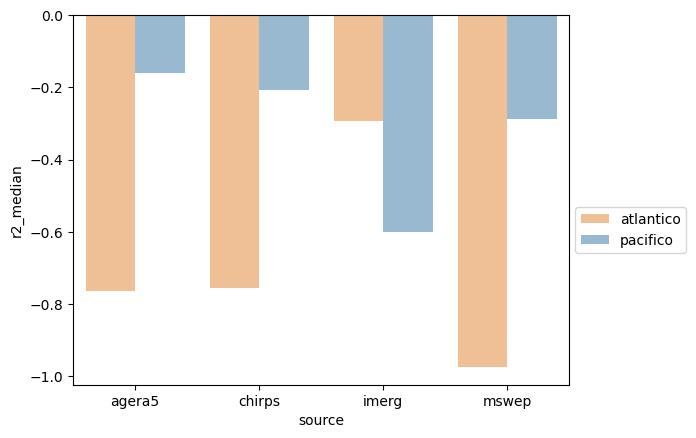

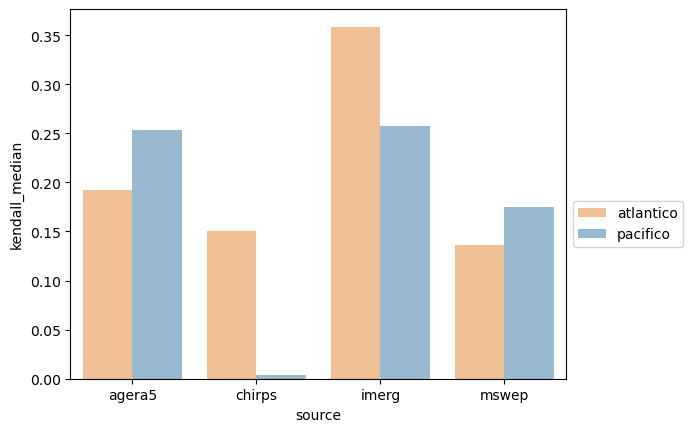

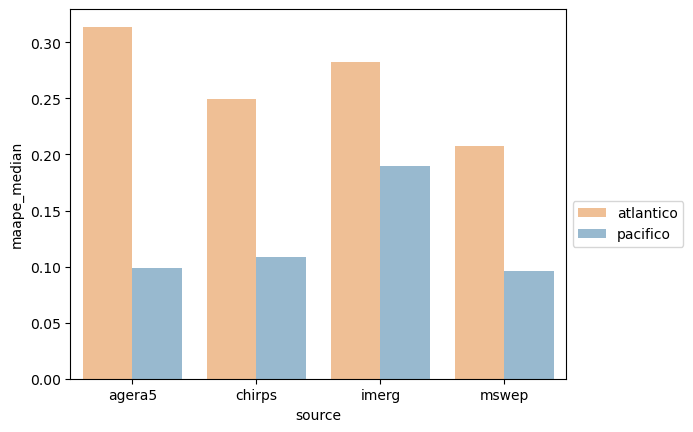

Month 4


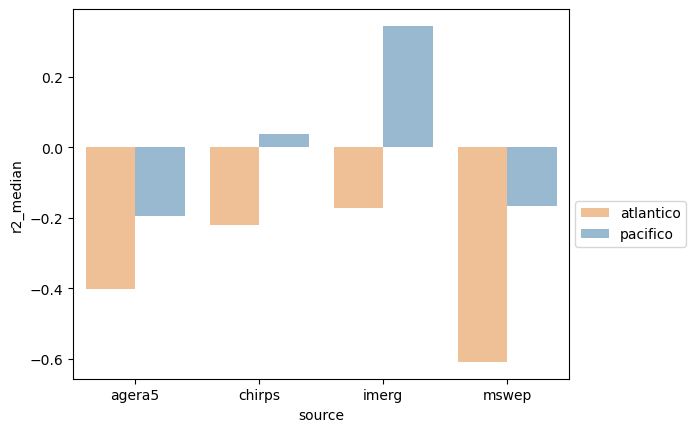

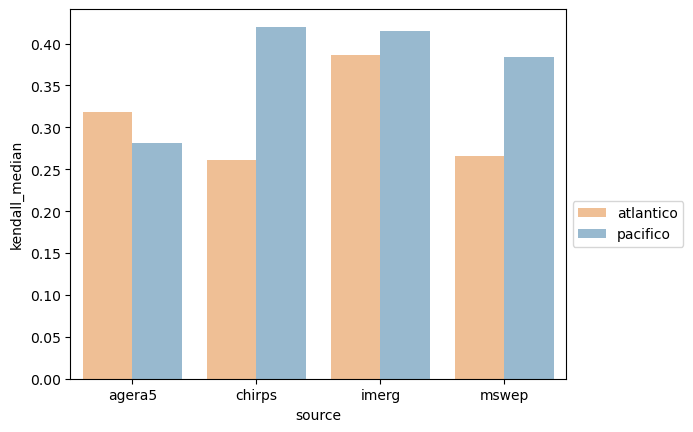

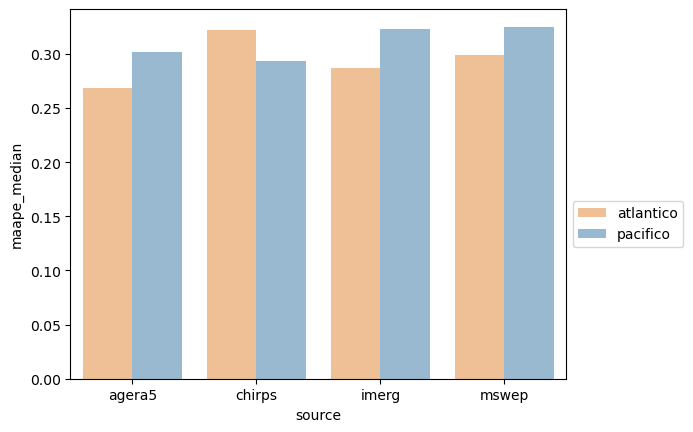

Month 5


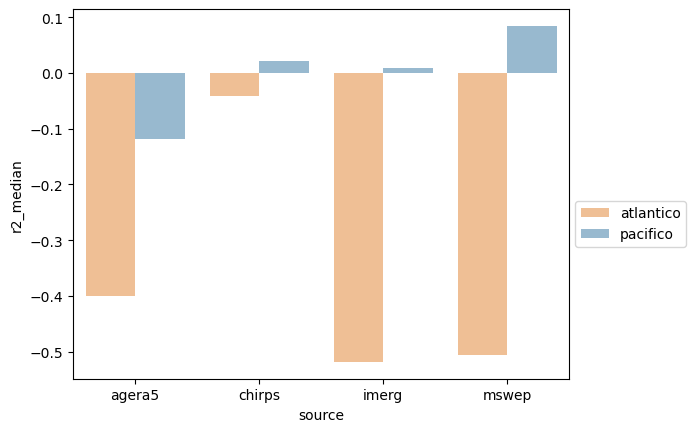

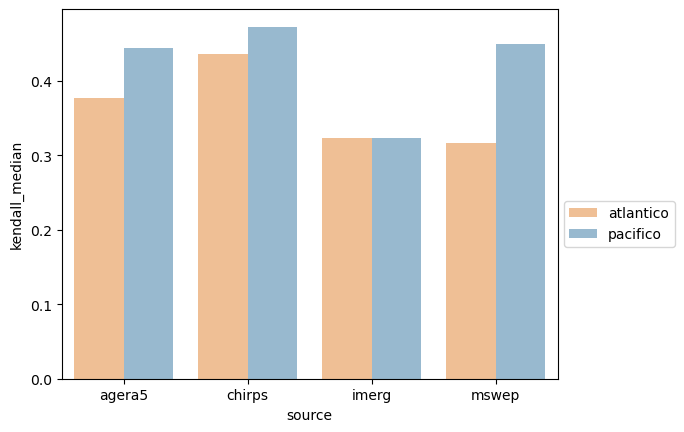

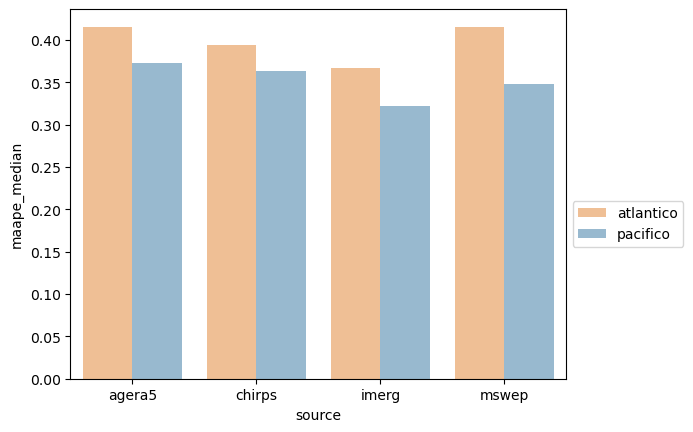

Month 6


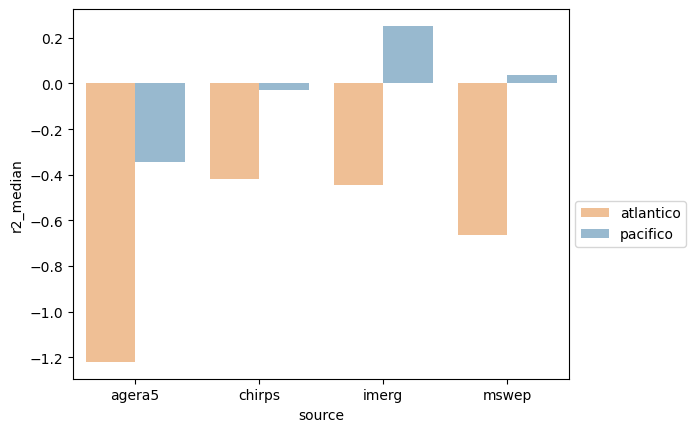

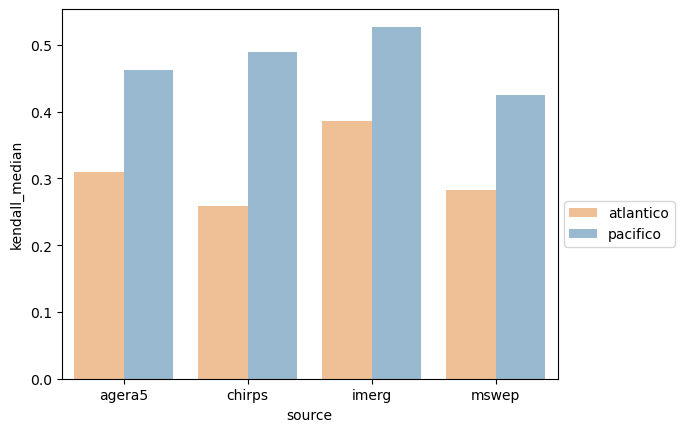

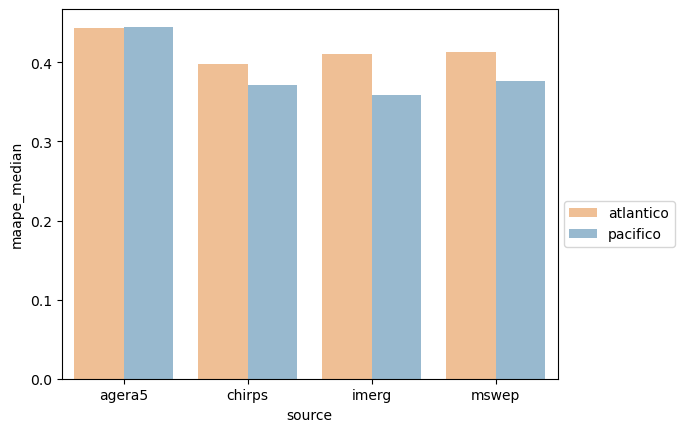

Month 7


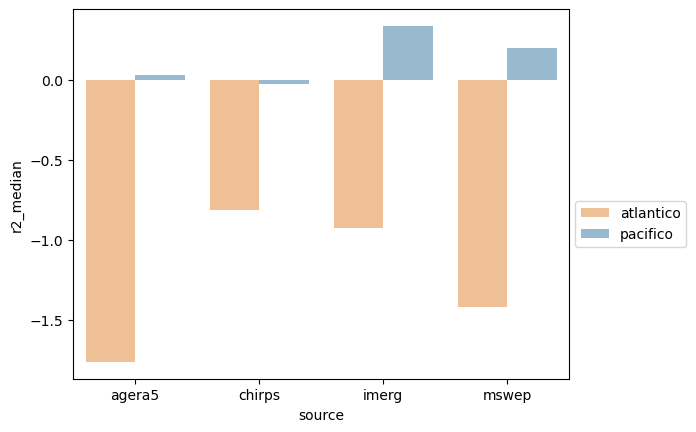

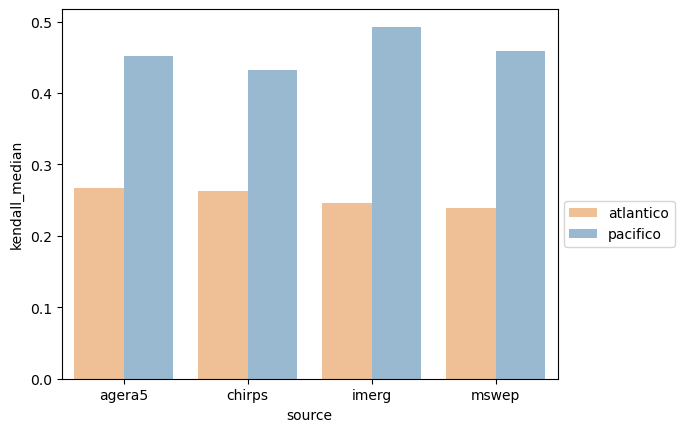

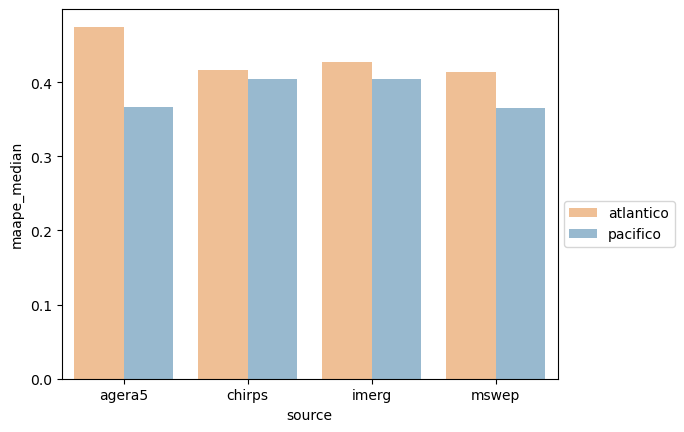

Month 8


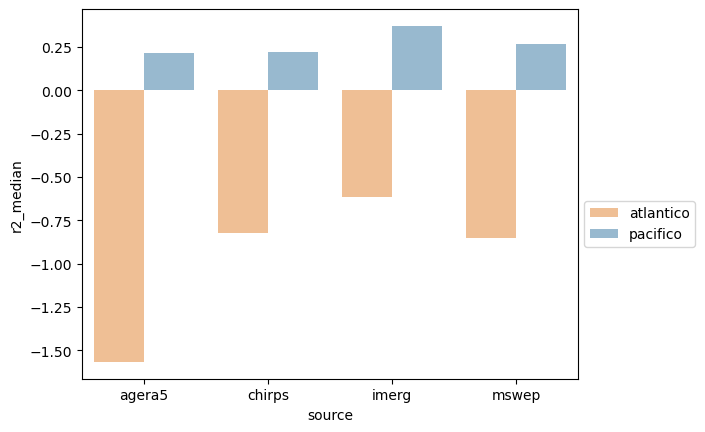

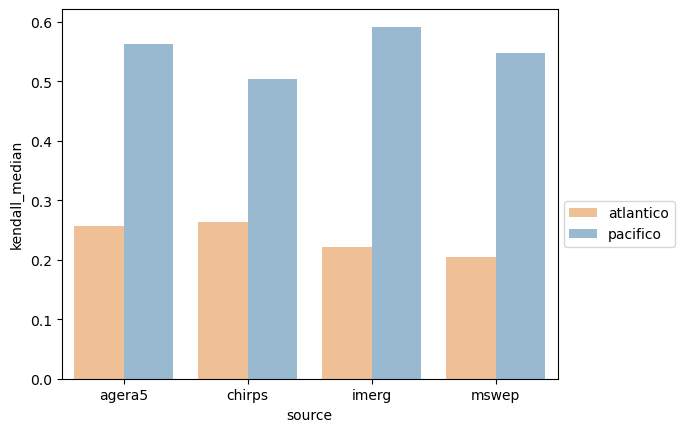

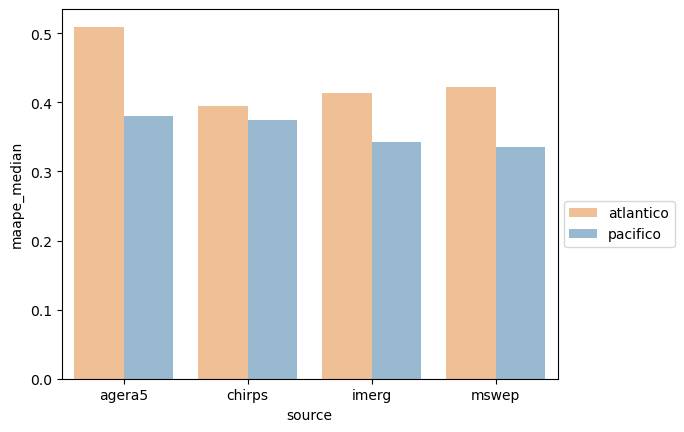

Month 9


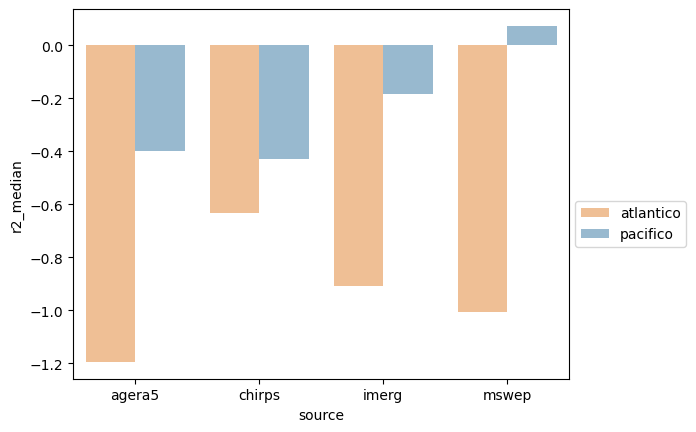

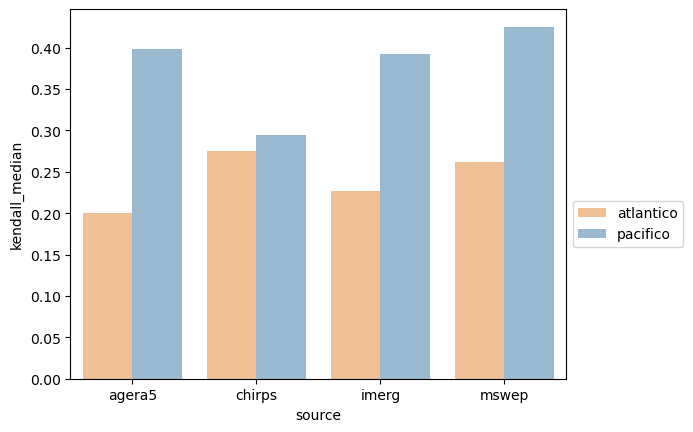

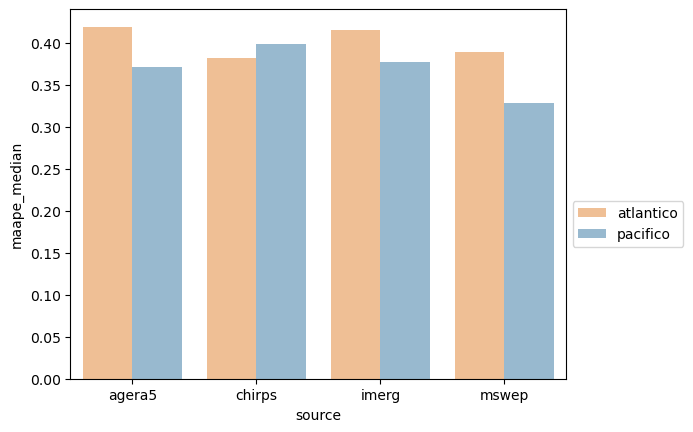

Month 10


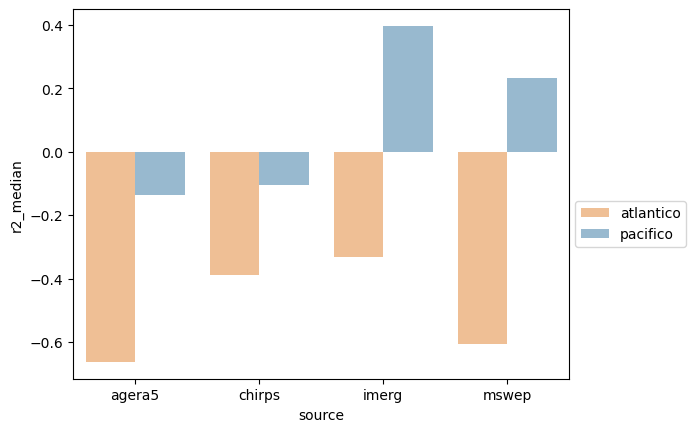

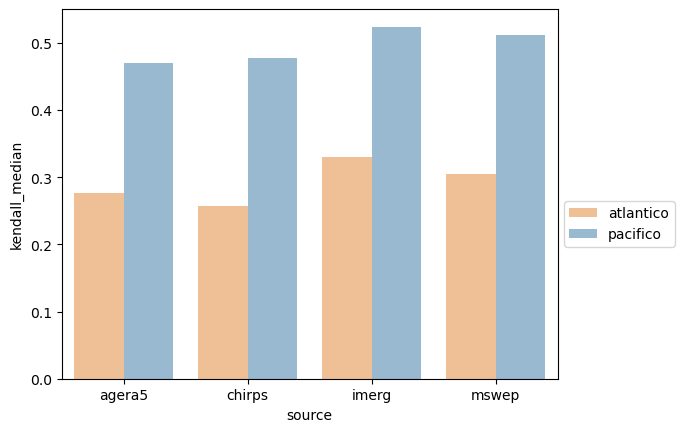

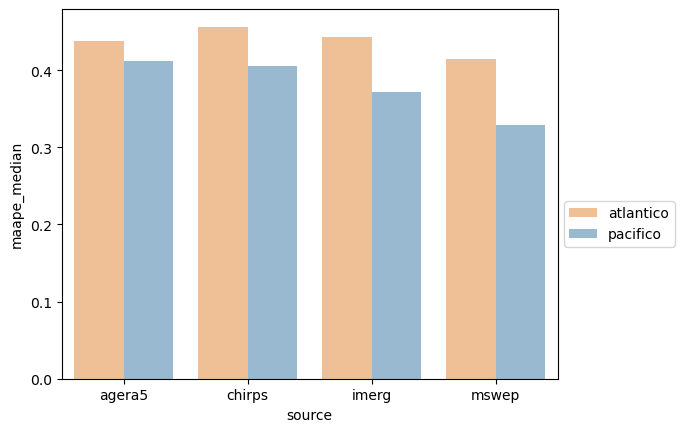

Month 11


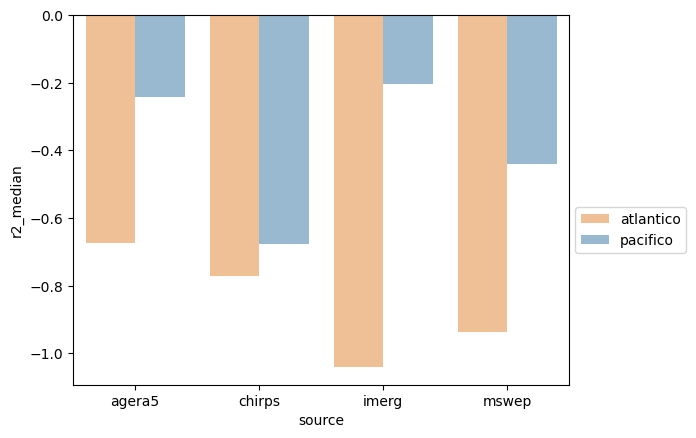

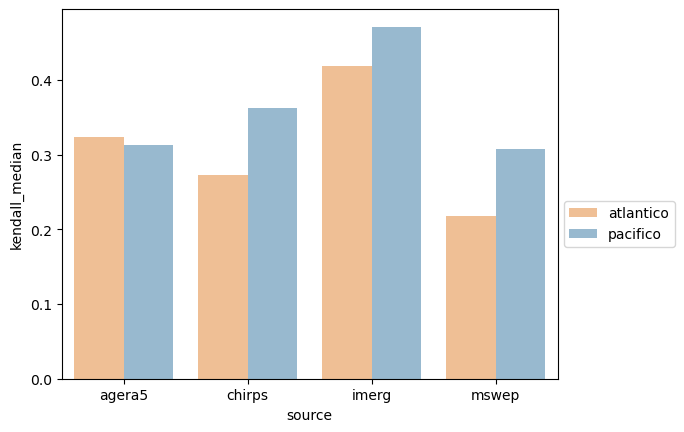

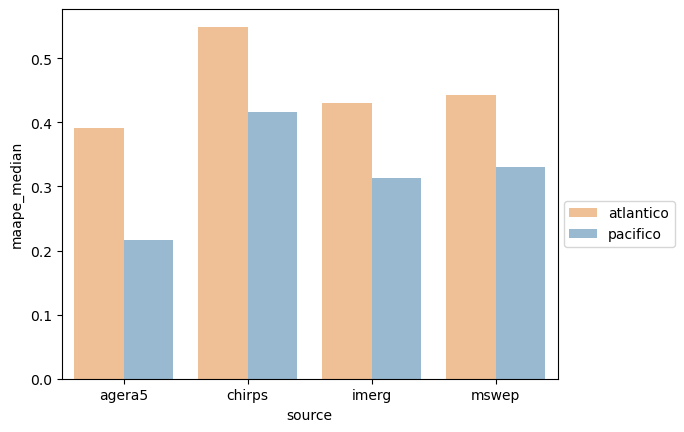

Month 12


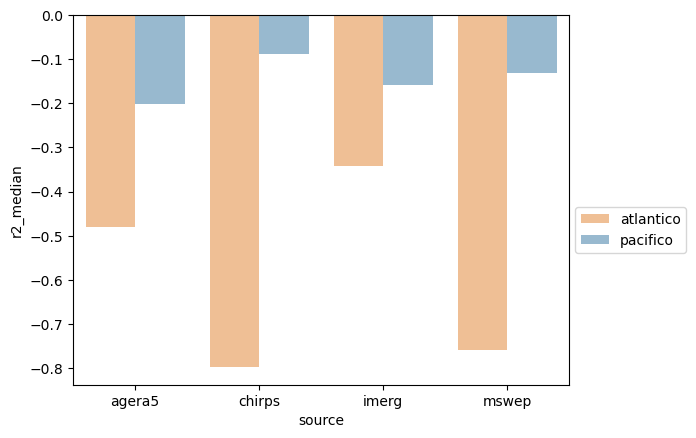

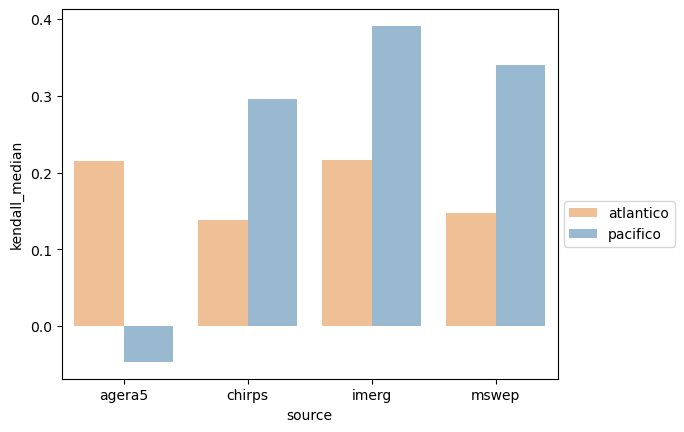

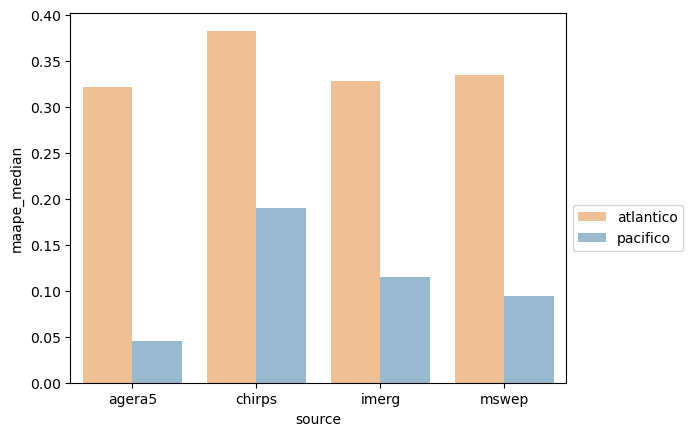

In [32]:
bars_monthly_cuenca(r15_monthly)